# 0. Introduction
Open University is a public British University that also has the highest number of undergraduate students in the UK. It is the largest academic institution in the United Kingdom (and one of the largest in Europe) with 2 Million enrolled students since it is established at 1969. As can be understood from its name, Open University mainly populated by off-campus students.

This dataset belongs to Open University Online Learning Platform (Also called as "Virtual Learning Environment(VLE)") that off-campus students use for accessing the course content, forum discussions, sending assessments and checking out assignment marks etc. It consists of 7 selected courses. Different presentations indicated with letters "B" and "J" after year for semester 2 and semester 1 respectively.

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1880515%2F864453733ec7cb92f003450ed38a2144%2FScreen%20Shot%202020-01-11%20at%208.41.59%20pm.png?generation=1578735825723455&alt=media)



# 1. Data Description

| Dataset                  | Column Name            | Description                                                                                         |
|--------------------------|------------------------|-----------------------------------------------------------------------------------------------------|
| **courses.csv**           | code_module            | Code name of the module (identifier).                                                               |
|                          | code_presentation      | Code name of the presentation (e.g., "2013B" for February, "2013J" for October).                     |
|                          | module_presentation    | Length of the module-presentation in days.                                                          |
| **assessments.csv**       | code_module            | Code name of the module (identifier).                                                               |
|                          | code_presentation      | Code name of the presentation (e.g., "2013B" for February, "2013J" for October).                     |
|                          | id_assessment          | Identification number of the assessment.                                                            |
|                          | assesment_type         | Type of assessment: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA), or Final Exam.  |
|                          | date                   | Submission date of the assessment (number of days since start of module-presentation).               |
|                          | weight                 | Weight of the assessment in %. Exams typically have 100%; the sum of other assessments is 100%.      |
| **studentAssessment.csv** | id_assessment          | Identification number of the assessment.                                                            |
|                          | id_student             | Unique identification number for the student.                                                       |
|                          | date_submitted         | Date of student submission (number of days since start of module-presentation).                      |
|                          | is_banked              | Flag indicating if the assessment result is transferred from a previous presentation.                |
|                          | score                  | Student's score in this assessment (0-100, with scores below 40 considered Fail).                    |
| **studentInfo.csv**       | code_module            | Code name of the module (identifier).                                                               |
|                          | code_presentation      | Code name of the presentation (e.g., "2013B" for February, "2013J" for October).                     |
|                          | id_student             | Unique identification number for the student.                                                       |
|                          | gender                 | Gender of the student.                                                                               |
|                          | region                 | Geographic region where the student lived while taking the module-presentation.                      |
|                          | highest_education      | Highest student education level on entry to the module presentation.                                 |
|                          | imd_band               | Index of Multiple Deprivation band of the student's location during the module-presentation.         |
|                          | age_band               | Band of the student's age.                                                                           |
|                          | num_of_prev_attempts   | Number of times the student has attempted this module.                                               |
|                          | studied_credits        | Total number of credits for the modules the student is currently studying.                           |
| **studentRegistration.csv**| date_registration     | Date of student's registration for the module presentation (relative to the start of module).        |
|                          | date_unregistration    | Date of student's unregistration from the module presentation (relative to the start of module).     |
| **studentVle.csv**        | id_site                | Identification number for the VLE material.                                                         |
|                          | date                   | Date of student's interaction with the material (number of days since start of module).              |
|                          | sum_click              | Number of times a student interacts with the material on that day.                                   |
| **vle.csv**               | activity_type          | Role associated with the module material.                                                           |
|                          | week_from              | Week from which the material is planned to be used.                                                 |
|                          | week_to                | Week until which the material is planned to be used.                                                |


In [2]:
 pip install kaggle















Note: you may need to restart the kernel to use updated packages.


In [3]:
 mkdir ~/.kaggle


In [4]:
cd ~/.kaggle/

/root/.kaggle


In [5]:
!chmod 600 ~/.kaggle/kaggle.json


chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [6]:
! kaggle datasets download anlgrbz/student-demographics-online-education-dataoulad

Dataset URL: https://www.kaggle.com/datasets/anlgrbz/student-demographics-online-education-dataoulad

License(s): Attribution 4.0 International (CC BY 4.0)


 78%|█████████████████████████████▊        | 33.0M/42.2M [00:00<00:00, 77.2MB/s]

100%|██████████████████████████████████████| 42.2M/42.2M [00:00<00:00, 81.4MB/s]


In [7]:
!unzip student-demographics-online-education-dataoulad.zip

Archive:  student-demographics-online-education-dataoulad.zip

  inflating: assessments.csv         

  inflating: courses.csv             

  inflating: studentAssessment.csv   

  inflating: studentInfo.csv         

  inflating: studentRegistration.csv  

  inflating: studentVle.csv          

  inflating: vle.csv                 


# 2. Importing Modules and Reading Data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.1 Merging Data
We need to merge these dataframes before performing analysis and feature engineering, we are dealing with 7 different tables and joinning them using a combosite key.

In [9]:
# Load datasets
studentRegistration = pd.read_csv('/root/.kaggle/studentRegistration.csv')
studentInfo = pd.read_csv('/root/.kaggle/studentInfo.csv')
studentVle = pd.read_csv('/root/.kaggle/studentVle.csv')
studentAssessment = pd.read_csv('/root/.kaggle/studentAssessment.csv')
courses = pd.read_csv('/root/.kaggle/courses.csv')
vle = pd.read_csv('/root/.kaggle/vle.csv')
assessments = pd.read_csv('/root/.kaggle/assessments.csv')

### 2.1.1 Merge student-related tables

Three of These dataframes contains combosite key ('id_student', 'code_module', 'code_presentation')
but first we need to decide whether to perform or outter join
1. **Inner Join**:
An inner join returns only the matching rows between the two tables (or dataframes) based on the specified key(s). If there's no match, those rows are excluded.
2. **Outer Join**:
An outer join returns all rows from both tables, whether they have matches or not.

### 2.1.2 Merging StudentInfo - StudentRegisteration - courses

We are not going to lose any information when merging these too, we will use StudentRegisteration to gain extra information about date of registeration and unregisteration, courses will add the module length for each course

In [10]:
student_data = pd.merge(studentRegistration, studentInfo, on=['id_student', 'code_module', 'code_presentation'], how='inner')

In [11]:
student_data = pd.merge(student_data, courses, on=['code_module', 'code_presentation'], how='inner')

### 2.1.3 Merging StudentAssesment - Assessments
These two tables refers to the data for each assessment a student had, in addition to the score and weight for each assessment

In [12]:
studentAssessment.shape

(173912, 5)

In [13]:
assessments.shape

(206, 6)

We will use inner merge to add the assesment details for each id_assessment, we are not going to lose any information


In [14]:
student_assesment_data = assessments.merge(studentAssessment,on=['id_assessment'],how="inner")

In [15]:
student_assesment_data

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0
...,...,...,...,...,...,...,...,...,...,...
173907,GGG,2014J,37437,TMA,173.0,0.0,652462,172,0,60.0
173908,GGG,2014J,37437,TMA,173.0,0.0,652539,176,0,75.0
173909,GGG,2014J,37437,TMA,173.0,0.0,653157,187,0,70.0
173910,GGG,2014J,37437,TMA,173.0,0.0,653252,171,0,70.0


In [16]:
print(student_assesment_data.weight.max())
print(student_assesment_data.weight.min())

100.0

0.0


In [17]:
student_assesment_data.isna().sum()

code_module             0
code_presentation       0
id_assessment           0
assessment_type         0
date                 2865
weight                  0
id_student              0
date_submitted          0
is_banked               0
score                 173
dtype: int64

#### Handling Missing values in score column
we can notice that all missing scores are of assesment_type TMA

In [18]:
missing_scores = student_assesment_data[student_assesment_data['score'].isnull()]
print(missing_scores.groupby(['assessment_type'])['id_assessment'].count())

assessment_type

TMA    173

Name: id_assessment, dtype: int64


In [19]:
tma_missing_scores = missing_scores[missing_scores['assessment_type'] == 'TMA']

# Check for patterns in missing scores related to other columns
print(tma_missing_scores.groupby(['code_module', 'code_presentation'])['id_assessment'].count())


code_module  code_presentation

AAA          2013J                 2

             2014J                 1

BBB          2013B                16

             2013J                10

             2014B                17

             2014J                10

CCC          2014B                 5

             2014J                 6

DDD          2013B                18

             2013J                 8

             2014B                11

             2014J                12

EEE          2013J                 3

             2014B                 2

             2014J                 2

FFF          2013B                14

             2013J                12

             2014B                11

             2014J                 9

GGG          2013J                 1

             2014B                 1

             2014J                 2

Name: id_assessment, dtype: int64


**Missing score values can be interpreted as non-submissions. This means we can fill them out with zeros.**

In [20]:
student_assesment_data["score"].fillna(0, inplace=True)
student_assesment_data.dropna(inplace=True) # We can drop the nulls in date column

/tmp/ipykernel_36/3715378783.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.

The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





  student_assesment_data["score"].fillna(0, inplace=True)


In [21]:
student_assesment_data.isna().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
id_student           0
date_submitted       0
is_banked            0
score                0
dtype: int64

Merging the assessment data with the student data will expand the student_data because each student can have multiple assessments. This results in a larger dataset where each row now reflects a unique student-assessment combination, with additional columns detailing the assessment information. While this significantly increases the number of rows, we will address the handling of this larger dataset later. For now, let's focus on combining all the data into a single comprehensive dataset

In [22]:
student_data_final = student_assesment_data.merge(student_data,on=['code_module','code_presentation','id_student'],how="inner")

In [23]:
student_data_final

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,...,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0,...,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,268
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0,...,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,268
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0,...,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,268
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0,...,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,268
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0,...,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171042,GGG,2014J,37437,TMA,173.0,0.0,652462,172,0,60.0,...,M,South Region,Lower Than A Level,90-100%,35-55,0,30,N,Pass,269
171043,GGG,2014J,37437,TMA,173.0,0.0,652539,176,0,75.0,...,F,South Region,A Level or Equivalent,70-80%,0-35,0,30,N,Pass,269
171044,GGG,2014J,37437,TMA,173.0,0.0,653157,187,0,70.0,...,F,West Midlands Region,Lower Than A Level,20-30%,0-35,0,30,N,Pass,269
171045,GGG,2014J,37437,TMA,173.0,0.0,653252,171,0,70.0,...,F,East Anglian Region,No Formal quals,20-30%,0-35,0,30,Y,Pass,269


In [24]:
student_data_final.isna().sum()

code_module                        0
code_presentation                  0
id_assessment                      0
assessment_type                    0
date                               0
weight                             0
id_student                         0
date_submitted                     0
is_banked                          0
score                              0
date_registration                  7
date_unregistration           157992
gender                             0
region                             0
highest_education                  0
imd_band                        7481
age_band                           0
num_of_prev_attempts               0
studied_credits                    0
disability                         0
final_result                       0
module_presentation_length         0
dtype: int64

In [25]:
df = student_data_final.copy()

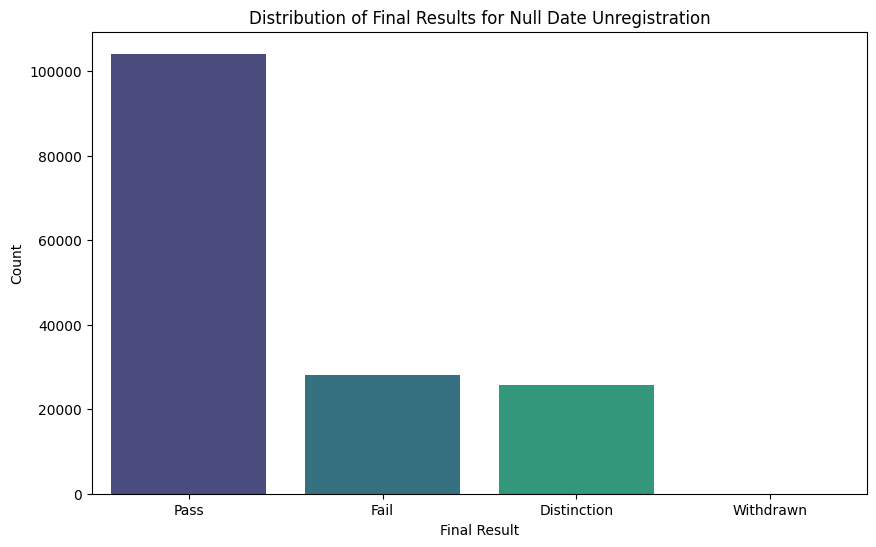

In [26]:
df_null_unregistration = df[df['date_unregistration'].isnull()]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_null_unregistration, x='final_result', palette='viridis')

plt.title('Distribution of Final Results for Null Date Unregistration')
plt.xlabel('Final Result')
plt.ylabel('Count')

plt.show()

date_Unregisteration descripes the date when the student unregisters from the moudle, Pass and Fail and Distinction means that a student finished the module, while withdrawn means that he didn't finish it

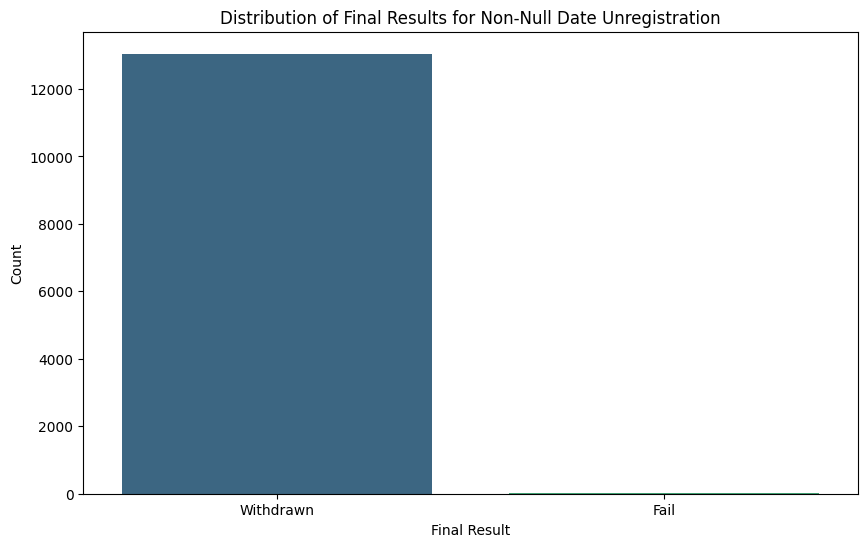

In [27]:
df_non_null_unregistration = df[df['date_unregistration'].notnull()]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_non_null_unregistration, x='final_result', palette='viridis')

plt.title('Distribution of Final Results for Non-Null Date Unregistration')
plt.xlabel('Final Result')
plt.ylabel('Count')

# Show the plot
plt.show()

Since we can't Impute all of these null values, and we know that date_unregistered is null when a student doesn't complete his study, we can assign finished-unfinished label instead of date_unregisteration, if the final result is (Pass,Fail,Distinction) a student finished, if it's (Withdrawn) student didn't finish

In [28]:
df['study_status'] = df['final_result'].apply(lambda x: 'finished' if x in ['Pass', 'Fail', 'Distinction'] else 'unfinished')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):


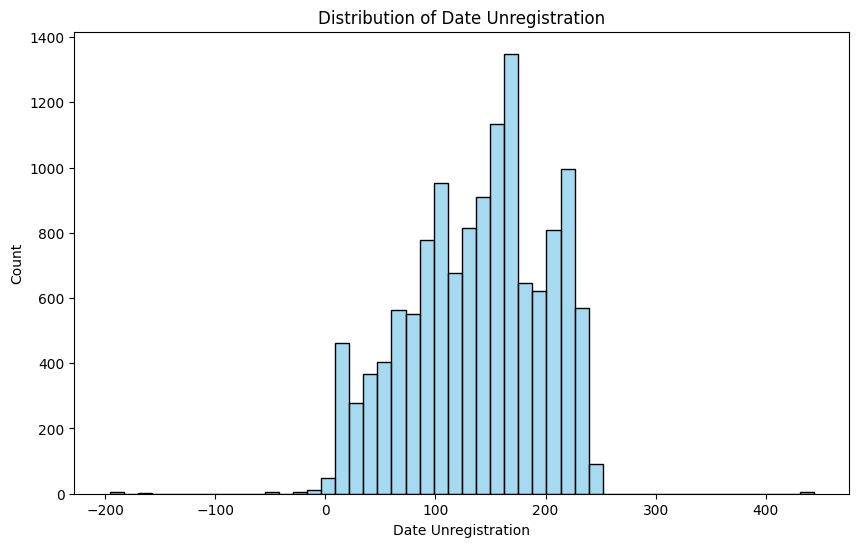

In [31]:
df_non_null = df[df['date_unregistration'].notnull()]

plt.figure(figsize=(10, 6))
sns.histplot(df_non_null['date_unregistration'], bins=50, color='skyblue')

plt.title('Distribution of Date Unregistration')
plt.xlabel('Date Unregistration')
plt.ylabel('Count')

plt.show()

In [32]:
df.isna().sum()

code_module                        0
code_presentation                  0
id_assessment                      0
assessment_type                    0
date                               0
weight                             0
id_student                         0
date_submitted                     0
is_banked                          0
score                              0
date_registration                  7
date_unregistration           157992
gender                             0
region                             0
highest_education                  0
imd_band                        7481
age_band                           0
num_of_prev_attempts               0
studied_credits                    0
disability                         0
final_result                       0
module_presentation_length         0
study_status                       0
dtype: int64

In [33]:
def categorize_withdrawal(date):
    if pd.isnull(date):
        return "didn't withdraw"
    elif date < 0:
        return 'early withdrawal'
    elif date >=0 and date < 70:
        return 'normal withdrawal'
    else:
        return 'late withdrawal'

df['withdrawal_status'] = df['date_unregistration'].apply(categorize_withdrawal)

df[['date_unregistration', 'withdrawal_status']].head()

,date_unregistration,withdrawal_status
0,NaN,didn't withdraw
1,NaN,didn't withdraw
2,NaN,didn't withdraw
3,NaN,didn't withdraw
4,NaN,didn't withdraw


In [34]:
df.drop(['date_unregistration'],axis=1,inplace=True) # dropping the column as it has many nulls and we already extracted useful information from it

In [35]:
df.isna().sum()

code_module                      0
code_presentation                0
id_assessment                    0
assessment_type                  0
date                             0
weight                           0
id_student                       0
date_submitted                   0
is_banked                        0
score                            0
date_registration                7
gender                           0
region                           0
highest_education                0
imd_band                      7481
age_band                         0
num_of_prev_attempts             0
studied_credits                  0
disability                       0
final_result                     0
module_presentation_length       0
study_status                     0
withdrawal_status                0
dtype: int64

imd_band specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.

we will fill out according to the most frequent band for that region

In [36]:

regions_list = df[df['imd_band'].isnull()]['region'].unique()

for region in regions_list:
  mode_imd_band = df[df['region'] == region]['imd_band'].mode()[0]
  df.loc[(df['imd_band'].isnull()) & (df['region'] == region), 'imd_band'] = mode_imd_band


In [37]:
df.isna().sum() # Only 7 records left in date_registeration
df.dropna(inplace=True)

### 2.1.4 Analyzing and merging Vle and StudentVle

Merging the studentVLE data with the VLE data will result in a significant expansion, similar to the previous merges. This is because each student interaction with online learning materials (tracked in studentVLE) is paired with the corresponding material details from VLE. Given that the studentVLE dataset contains over 10 million records, this merge will lead to a very large number of rows. However, we plan to reduce this later using grouping techniques to aggregate and condense the data, making it more manageable. For now, let's proceed with the merge, knowing we'll optimize the dataset afterward.

In [38]:
studentVle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [39]:
vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [40]:
student_interaction = studentVle.merge(vle,on=['code_module','code_presentation','id_site'],how="inner")

In [41]:
student_interaction

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,week_from,week_to
0,AAA,2013J,28400,546652,-10,4,forumng,NaN,NaN
1,AAA,2013J,28400,546652,-10,1,forumng,NaN,NaN
2,AAA,2013J,28400,546652,-10,1,forumng,NaN,NaN
3,AAA,2013J,28400,546614,-10,11,homepage,NaN,NaN
4,AAA,2013J,28400,546714,-10,1,oucontent,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3,homepage,NaN,NaN
10655276,GGG,2014J,675578,896943,269,1,homepage,NaN,NaN
10655277,GGG,2014J,654064,896943,269,3,homepage,NaN,NaN
10655278,GGG,2014J,654064,896939,269,1,forumng,NaN,NaN


We only need Sum_Click for each student ID, we can ignore the date, week_from, week_to as they contain too many nulls and doesn't provide much information for feature engineering

In [42]:
grouped_student_interaction = student_interaction.groupby(
    ['id_student', 'code_module', 'code_presentation','activity_type'], as_index=False
)["sum_click"].agg(['sum', 'count'])

In [43]:
grouped_student_interaction

,id_student,code_module,code_presentation,activity_type,sum,count
0,6516,AAA,2014J,dataplus,21,4
1,6516,AAA,2014J,forumng,451,175
2,6516,AAA,2014J,homepage,497,158
3,6516,AAA,2014J,oucontent,1505,184
4,6516,AAA,2014J,resource,31,19
...,...,...,...,...,...,...
240352,2698588,BBB,2014J,oucollaborate,7,7
240353,2698588,BBB,2014J,oucontent,233,74
240354,2698588,BBB,2014J,resource,49,36
240355,2698588,BBB,2014J,subpage,76,34


In [44]:
merged_df = grouped_student_interaction.merge(df,
                                              on=['id_student', 'code_module', 'code_presentation'],
                                              how='inner')

In [45]:
merged_df

,id_student,code_module,code_presentation,activity_type,sum,count,id_assessment,assessment_type,date,weight,...,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length,study_status,withdrawal_status
0,6516,AAA,2014J,dataplus,21,4,1758,TMA,19.0,10.0,...,HE Qualification,80-90%,55<=,0,60,N,Pass,269,finished,didn't withdraw
1,6516,AAA,2014J,dataplus,21,4,1759,TMA,54.0,20.0,...,HE Qualification,80-90%,55<=,0,60,N,Pass,269,finished,didn't withdraw
2,6516,AAA,2014J,dataplus,21,4,1760,TMA,117.0,20.0,...,HE Qualification,80-90%,55<=,0,60,N,Pass,269,finished,didn't withdraw
3,6516,AAA,2014J,dataplus,21,4,1761,TMA,166.0,20.0,...,HE Qualification,80-90%,55<=,0,60,N,Pass,269,finished,didn't withdraw
4,6516,AAA,2014J,dataplus,21,4,1762,TMA,215.0,30.0,...,HE Qualification,80-90%,55<=,0,60,N,Pass,269,finished,didn't withdraw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579980,2698588,BBB,2014J,url,2,2,15020,TMA,19.0,0.0,...,HE Qualification,30-40%,0-35,0,120,N,Distinction,262,finished,didn't withdraw
1579981,2698588,BBB,2014J,url,2,2,15021,TMA,54.0,10.0,...,HE Qualification,30-40%,0-35,0,120,N,Distinction,262,finished,didn't withdraw
1579982,2698588,BBB,2014J,url,2,2,15022,TMA,110.0,20.0,...,HE Qualification,30-40%,0-35,0,120,N,Distinction,262,finished,didn't withdraw
1579983,2698588,BBB,2014J,url,2,2,15023,TMA,152.0,35.0,...,HE Qualification,30-40%,0-35,0,120,N,Distinction,262,finished,didn't withdraw


In [46]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1579985 entries, 0 to 1579984

Data columns (total 26 columns):

 #   Column                      Non-Null Count    Dtype  

---  ------                      --------------    -----  

 0   id_student                  1579985 non-null  int64  

 1   code_module                 1579985 non-null  object 

 2   code_presentation           1579985 non-null  object 

 3   activity_type               1579985 non-null  object 

 4   sum                         1579985 non-null  int64  

 5   count                       1579985 non-null  int64  

 6   id_assessment               1579985 non-null  int64  

 7   assessment_type             1579985 non-null  object 

 8   date                        1579985 non-null  float64

 9   weight                      1579985 non-null  float64

 10  date_submitted              1579985 non-null  int64  

 11  is_banked                   1579985 non-null  int64  

 12  score                       1579985 non

In [47]:
merged_df.isna().sum()

id_student                    0
code_module                   0
code_presentation             0
activity_type                 0
sum                           0
count                         0
id_assessment                 0
assessment_type               0
date                          0
weight                        0
date_submitted                0
is_banked                     0
score                         0
date_registration             0
gender                        0
region                        0
highest_education             0
imd_band                      0
age_band                      0
num_of_prev_attempts          0
studied_credits               0
disability                    0
final_result                  0
module_presentation_length    0
study_status                  0
withdrawal_status             0
dtype: int64

# 3. Data Analysis
After cleanning the data from null values and merging all the dataframes, we should perform analysis to find inconsistensies in features, understand data skewness, find anomalies and extract new features, we will perform the analysis on the 1.5M data

## 3.1 Univariate Analysis

### 3.1.1 Statistical Description

In [48]:
merged_df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
id_student,1579985.0,709058.613296,557288.970830,6516.0,504819.0,584433.0,634999.0,2698588.0
sum,1579985.0,213.242971,467.777696,1.0,11.0,48.0,203.0,13154.0
count,1579985.0,55.619988,85.525877,1.0,7.0,25.0,68.0,1727.0
id_assessment,1579985.0,27805.969487,8495.165446,1752.0,24289.0,30717.0,34887.0,37443.0
date,1579985.0,135.965156,79.430351,12.0,54.0,131.0,222.0,261.0
weight,1579985.0,11.325690,14.101992,0.0,0.0,9.0,18.0,100.0
date_submitted,1579985.0,115.706554,70.747990,-11.0,51.0,116.0,173.0,608.0
is_banked,1579985.0,0.007204,0.084573,0.0,0.0,0.0,0.0,1.0
score,1579985.0,76.478818,18.138025,0.0,67.0,80.0,90.0,100.0
date_registration,1579985.0,-66.479240,46.909750,-311.0,-95.0,-53.0,-29.0,124.0


### Observations


*   sum column describes the total number of interactions a student done with the vle, grouped by code-module and code-presentation, most of the data is below 213, that shows a lot of outliers in this column.

*   count represents the how often a student interacts with the vle grouped by code-module and code-presentation, we may infer that the average user logs in 55 time, with a high standard deviation so some students have many more activities or events recorded than others.

*   The weight column has a mean value of 11.32, with 0 for the 25th percentile, meaning that a large portion of the data could have zero values.

*   The date submitted has a wide range (-11 to 608), with a median of 116, which might indicate some submissions were early (negative values) and others very late (up to 608).

*   The score ranges from 0 to 100, with a median score of 80 and a relatively low standard deviation (~18), indicating that most scores are clustered around the 75th percentile.
*   Most students have 0 previous attempts (25th, 50th, and 75th percentiles are 0), but the maximum number of previous attempts is 6.
*   Credits studied range from 0 to 630, with a mean of 78, and 50% of the students studied less than 90 credits.
*   This column is tightly clustered, with a range of 234 to 269 and a mean of 255, suggesting that the module presentations are generally of similar length.


### 3.1.2 Numerical Columns Distribution

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating inste

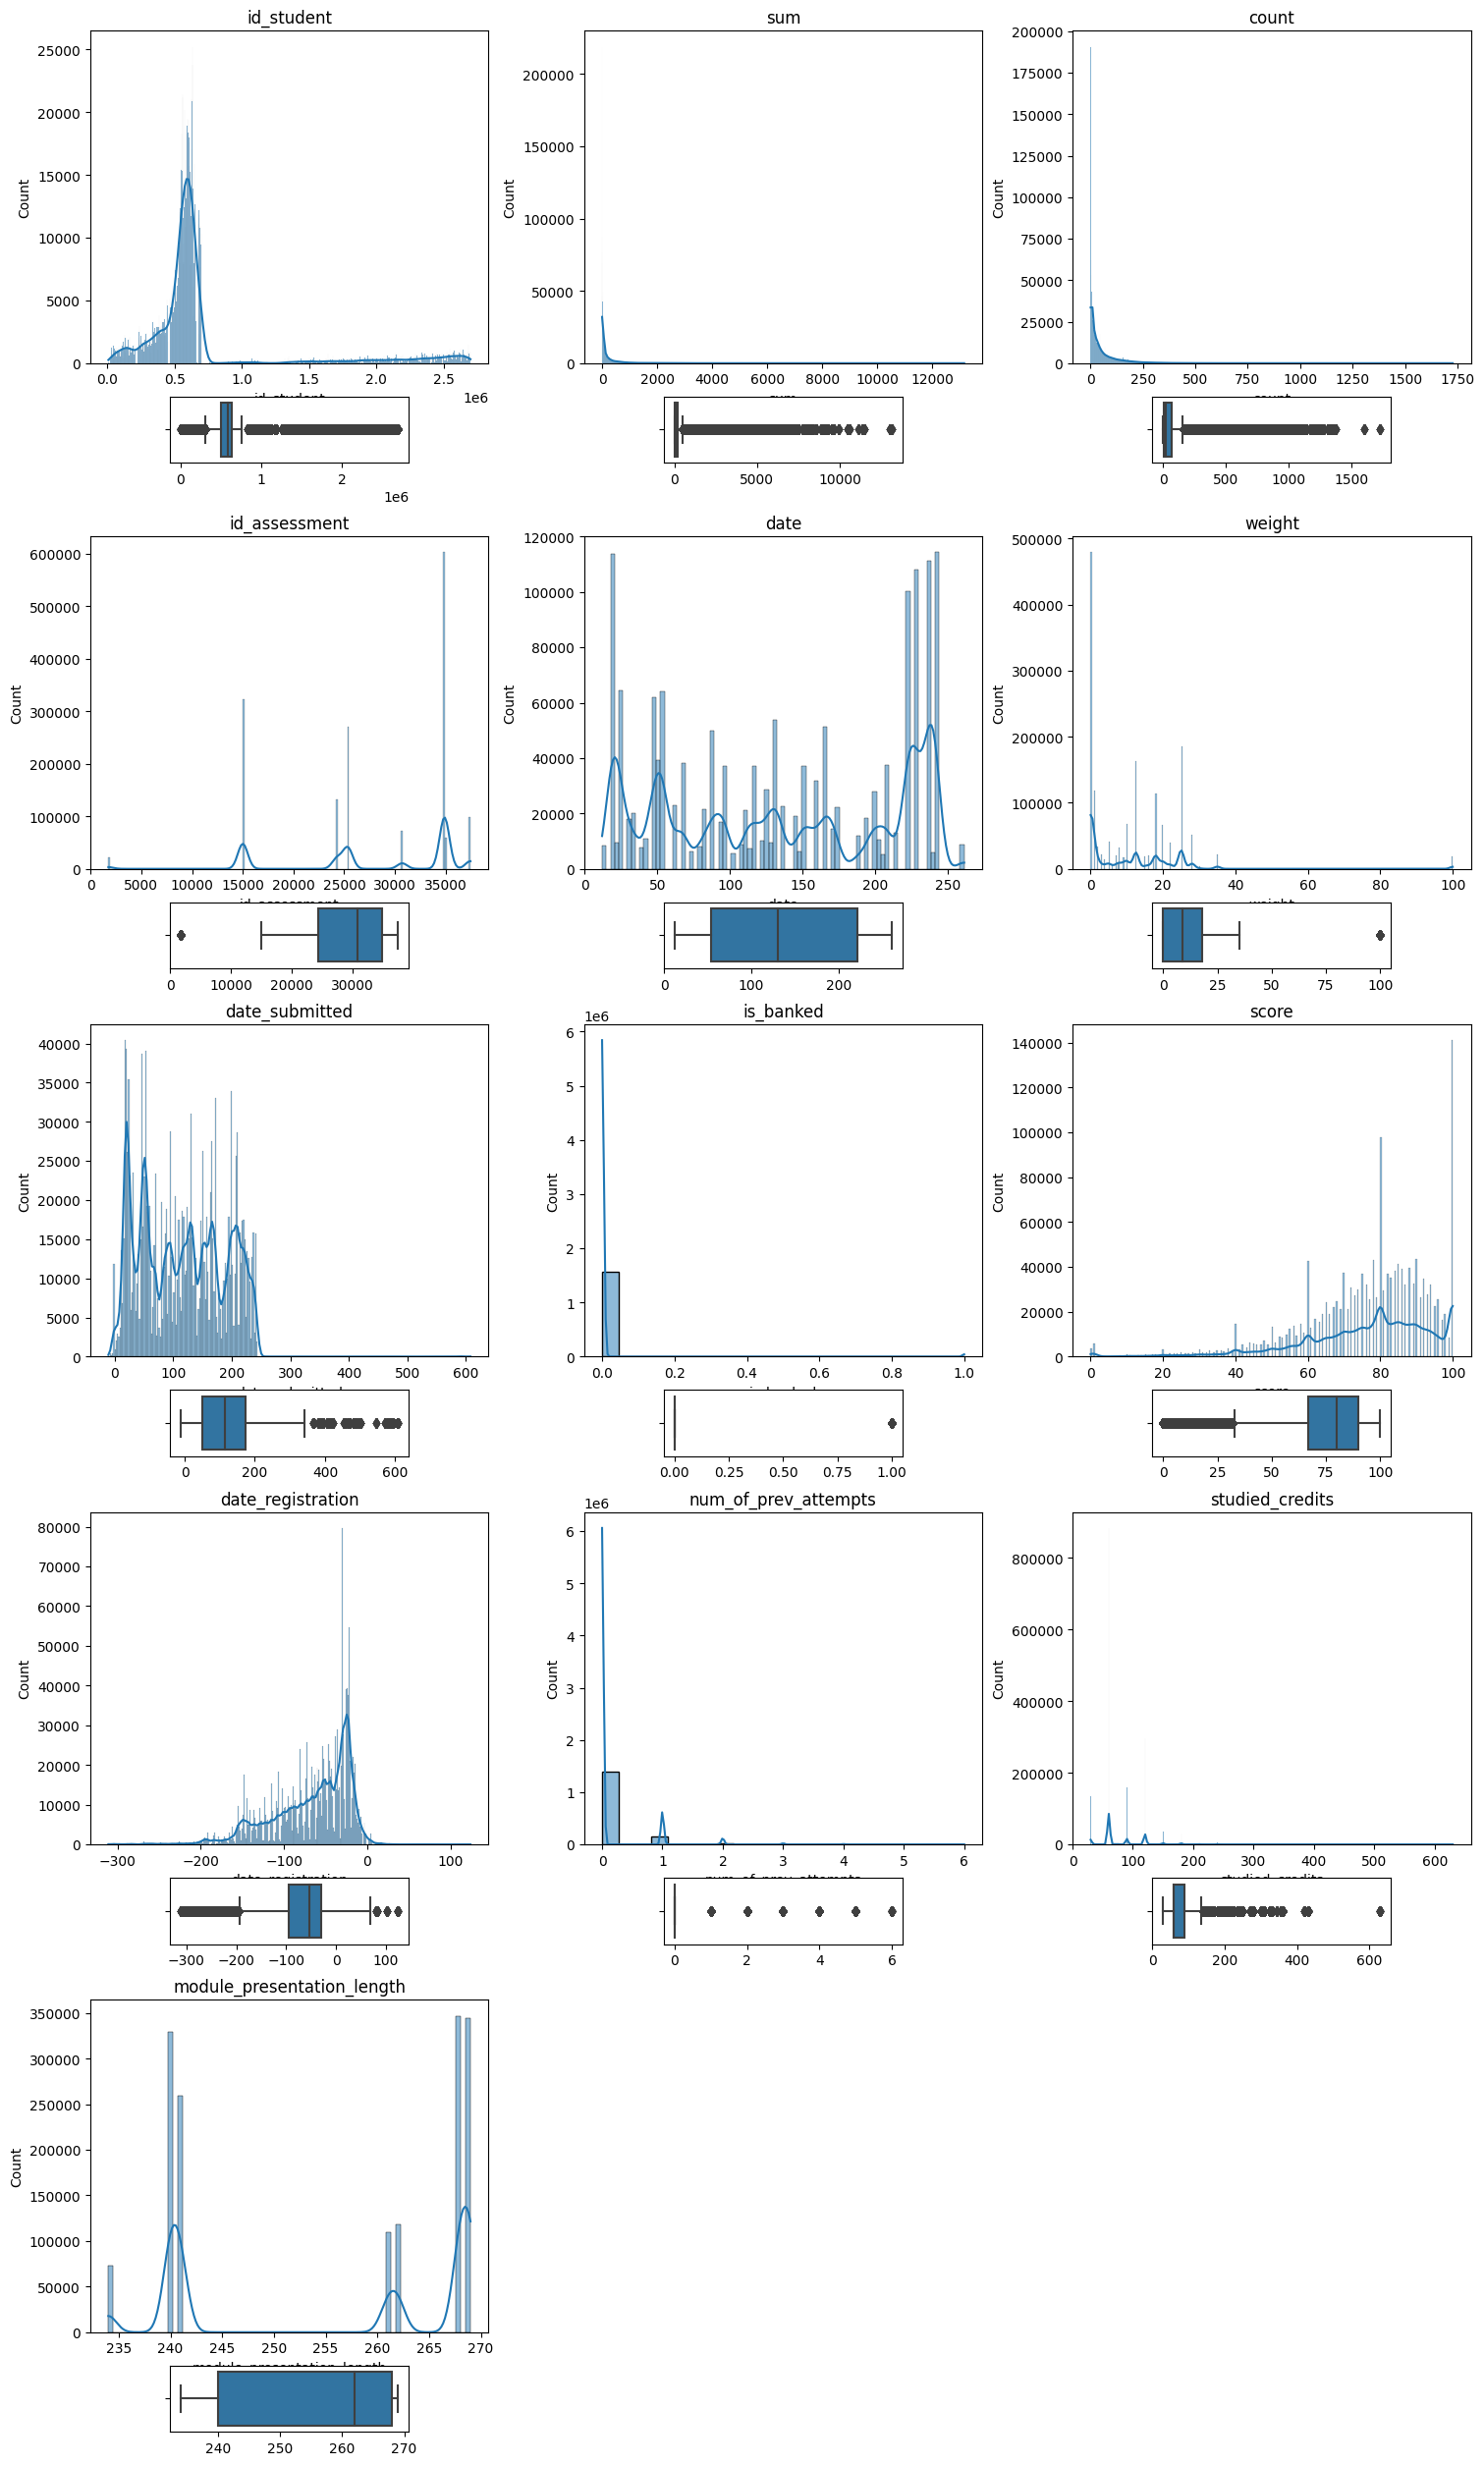

In [49]:
numerical_cols = merged_df.select_dtypes(include='number').columns

num_cols = 3  # Number of columns in the grid
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(merged_df[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

    ax_box = axes[i].inset_axes([0.2, -0.3, 0.6, 0.2])  # [x, y, width, height]
    sns.boxplot(x=merged_df[col], ax=ax_box, orient='h')
    ax_box.set(xlabel='')
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.show()


### Observations
- as we said, sum and count has many outliers because students interact differently with the vle system
- for id_assessment, the distribution has clear spikes, suggesting that certain assessment IDs are much more frequent than others.
- for date, The boxplot suggests a fairly even spread across the middle 50% of the data, with no obvious outliers, indicating the dates are relatively distributed over the range.
- weight shows that not all assesment has the same weight, we will investigate further
- date_submitted shows a lot of outliers indicating late submissions
- is_banked is very unbalanced
- score shows that most data ranges between 30-100 with outliers

### 3.1.3 Catgorical data distribution

In [50]:
df_cat = merged_df.select_dtypes(exclude=np.number)


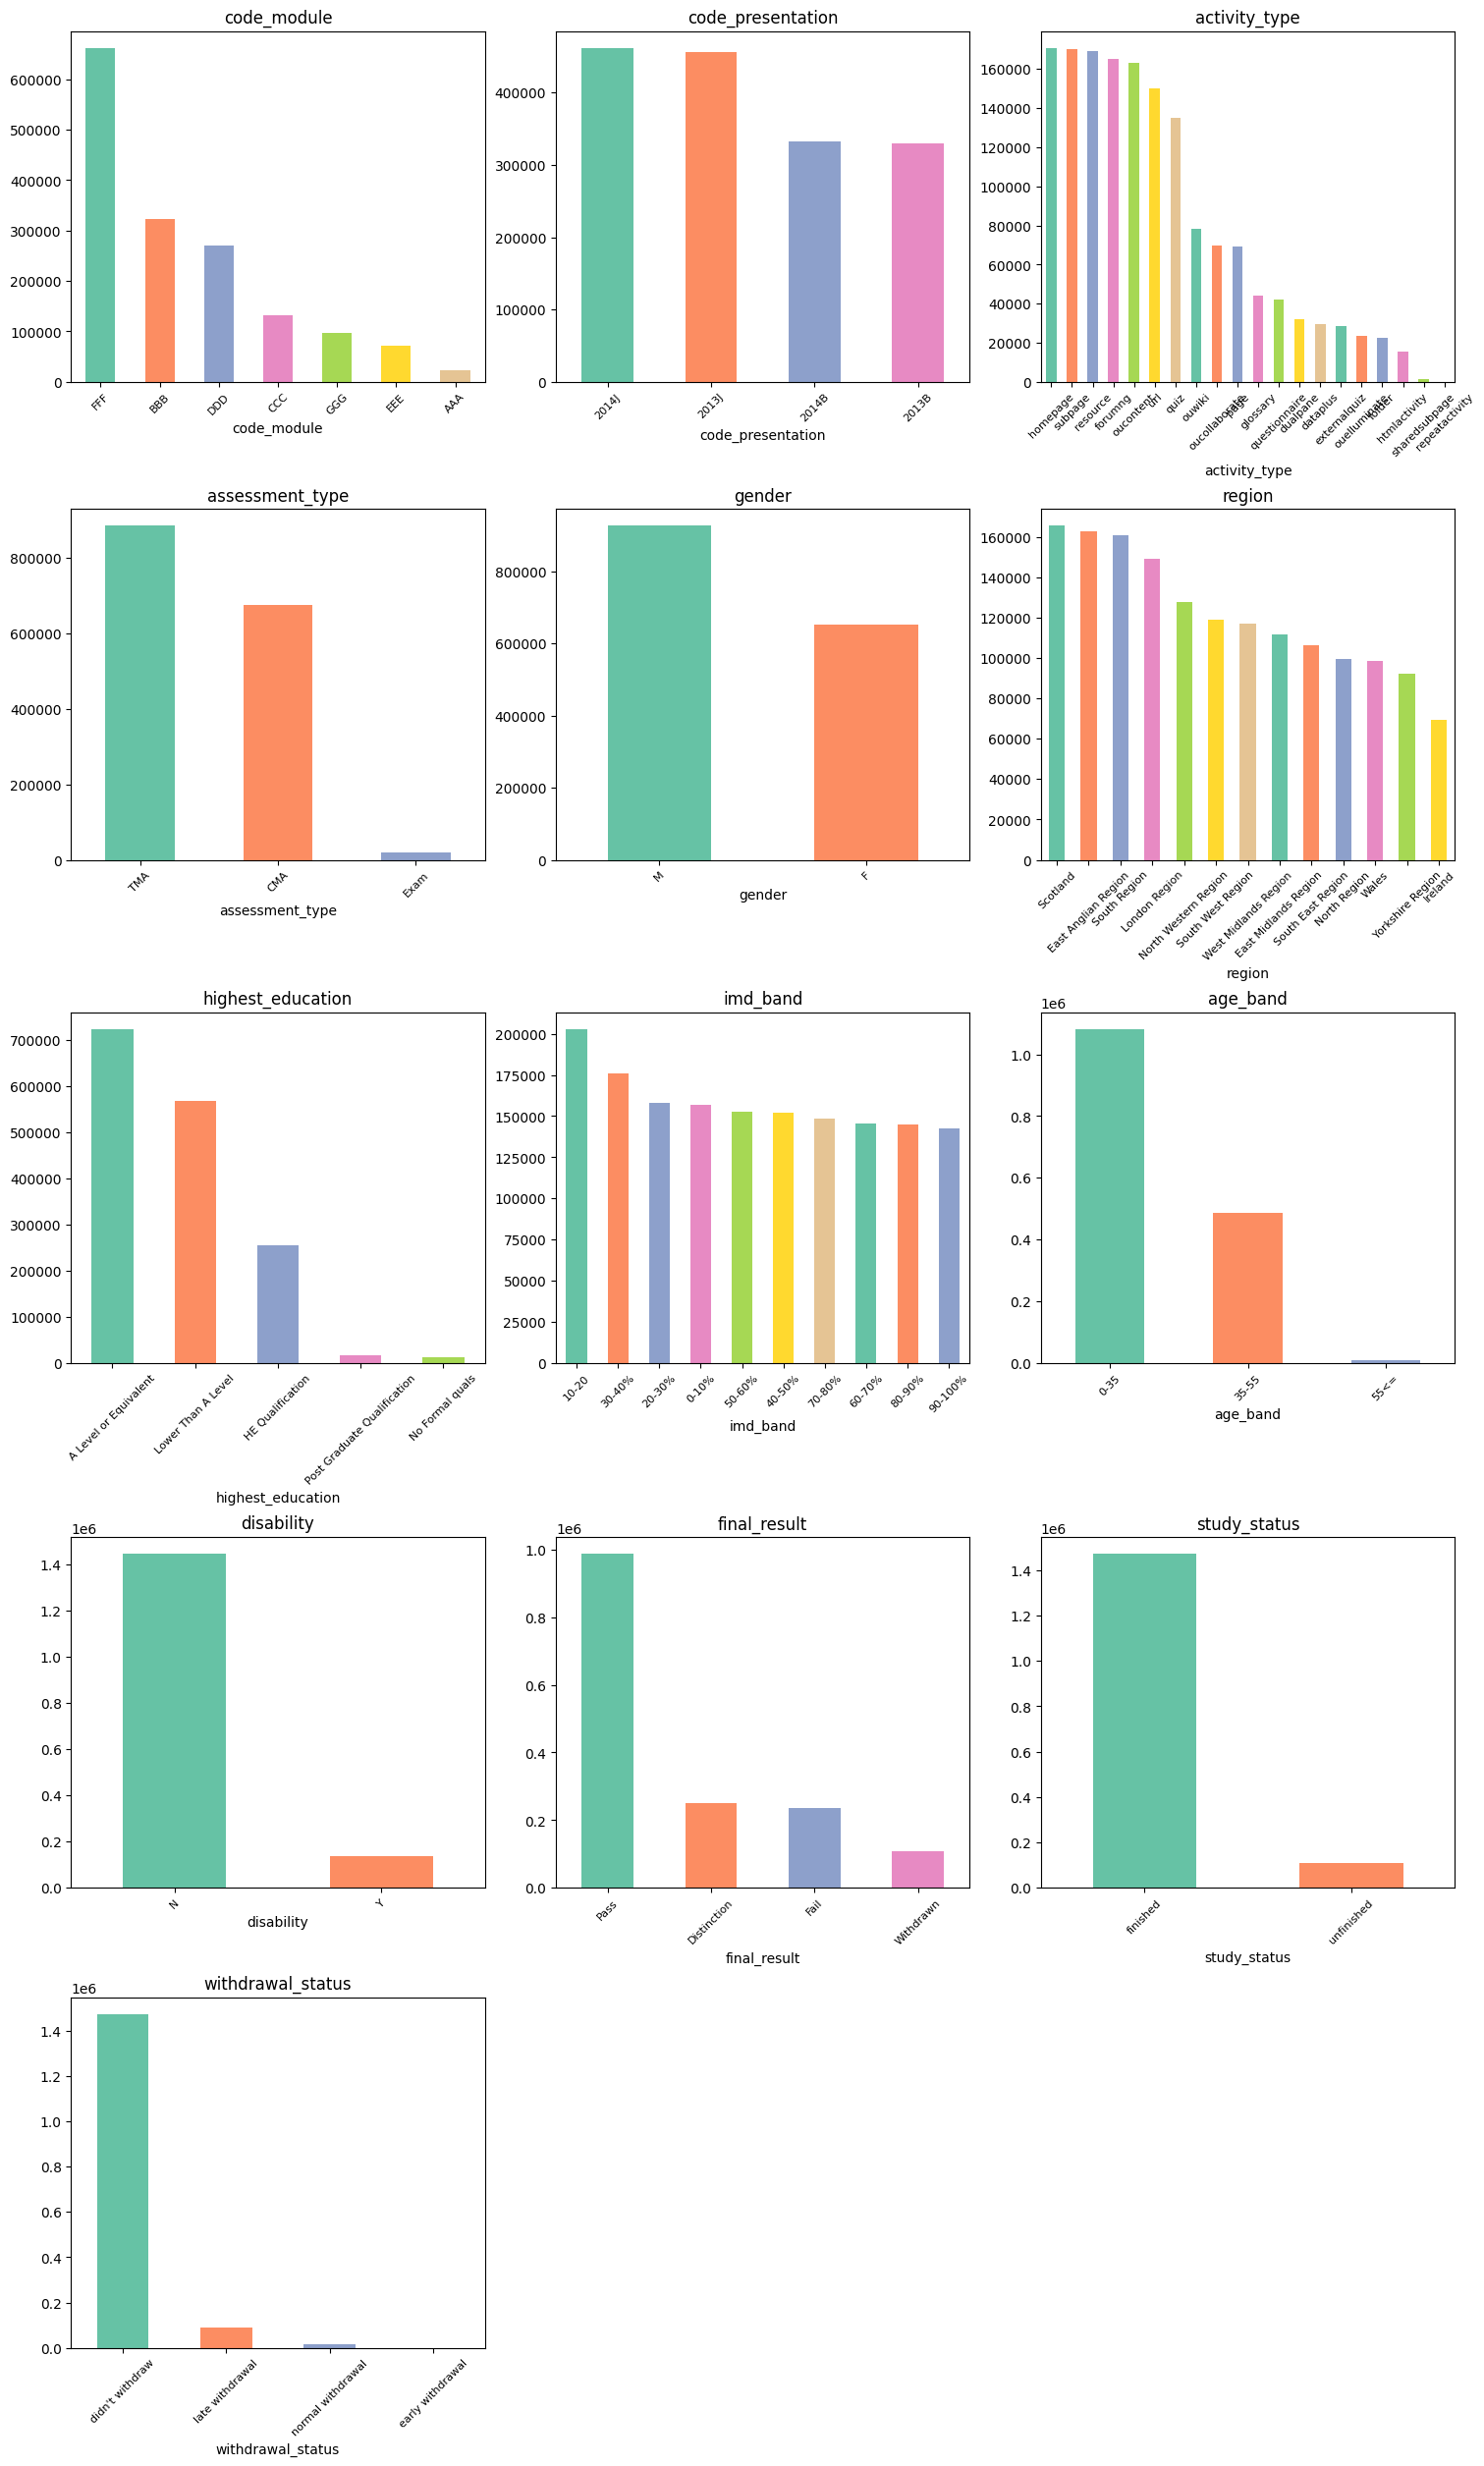

In [51]:
num_cols = 3  # Number of columns in the grid
num_rows = (len(df_cat.columns) + num_cols - 1) // num_cols

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), constrained_layout=True)
axes = axes.flatten()
palette = sns.color_palette("Set2", len(df_cat.iloc[:, 0].value_counts()))

for i, col in enumerate(df_cat.columns):
    df_cat[col].value_counts().plot(kind='bar', ax=axes[i], color=palette)
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
for j in range(len(df_cat.columns), len(axes)):
    fig.delaxes(axes[j])

plt.show()


- Very few students with no formal education (1%)
- Very few students with post-grad qualifications.
- These two categories should be merged with 'Lower Than A Level' and 'HE Qualification', respectivelly, as with so little data these two categories are not likely to bring much insight.
- Our students come from various regions of the UK, Scotland, Ireland and Wales. Scotland individually has the most students with 11.03% of students. Ireland has the least amoung of students with 4.13% of students. Most of our students come from various regions of England with 78.1% of students.
- In the above bar graph we see the distribution of students by IMD band. Many students seem to be in more deprived areas with a spike in students in the 10-20% band.
- genders are fairly evenly distributed with males being slightly more represented in our student sample.
- distribution of disabled to non-disabled students we see that under 10% of our students identified as having disabilities and so are underrepresented in this group.
- Above we can see that students have a negative result of withdrawing or failing nearly 42% of the time, with around 58% of students achieving a positive result of passing or passing with distinction.
-

#### Grouping highest_education and age

In [52]:
merged_df['highest_education'] = np.where( (merged_df['highest_education'] == 'No Formal quals'),'Lower Than A Level',merged_df['highest_education'])


# Rename post-grads
merged_df['highest_education'] = np.where( (merged_df['highest_education'] == 'Post Graduate Qualification'),'HE Qualification',merged_df['highest_education'])



This also can be done with Age feature

In [53]:
merged_df['age_band'] = np.where( (merged_df['age_band'] == '55<='), '35+', merged_df['age_band'])

merged_df['age_band'] = np.where( (merged_df['age_band'] == '35-55'),'35+',merged_df['age_band'])

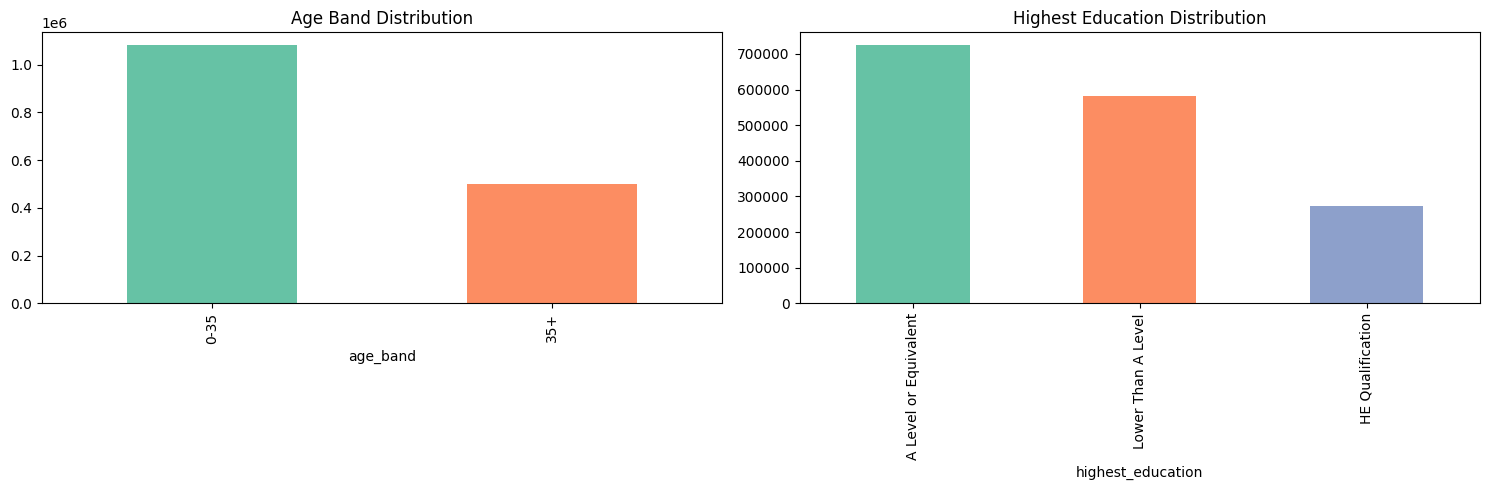

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
palette = sns.color_palette("Set2", len(df_cat[col].value_counts()))

merged_df['age_band'].value_counts().plot(kind='bar', ax=axes[0],color=palette)
axes[0].set_title('Age Band Distribution')

merged_df['highest_education'].value_counts().plot(kind='bar', ax=axes[1],color=palette)
axes[1].set_title('Highest Education Distribution')

plt.tight_layout()
plt.show()


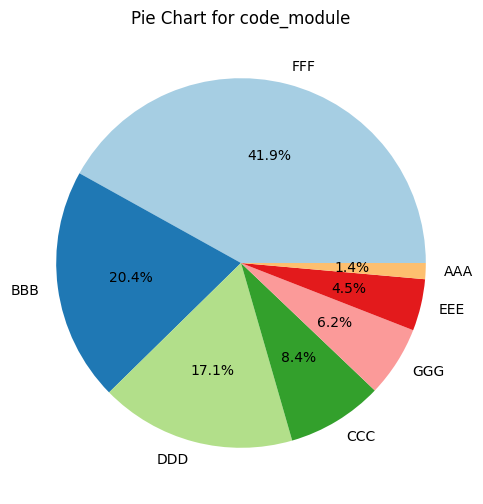

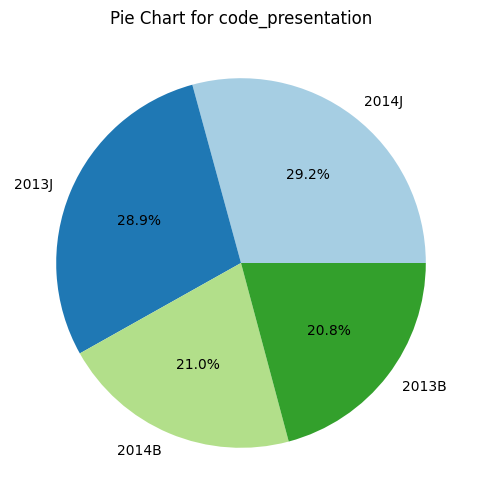

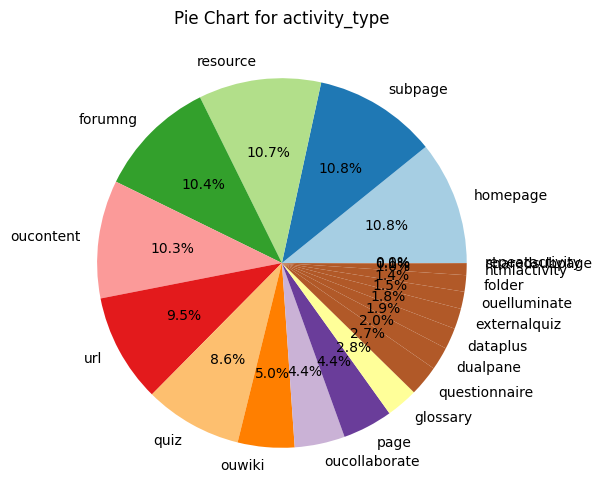

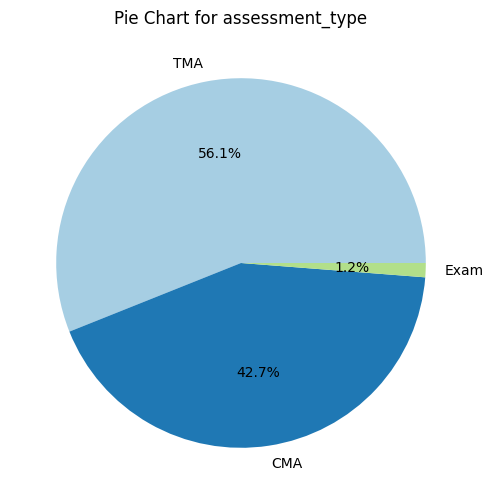

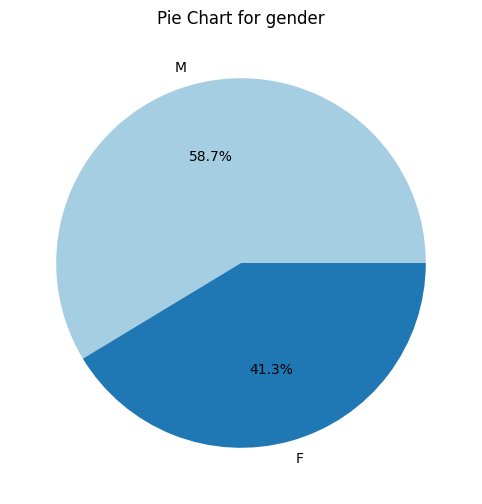

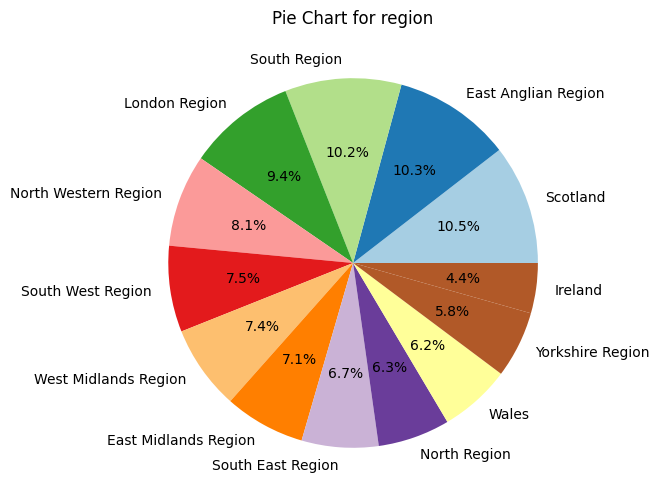

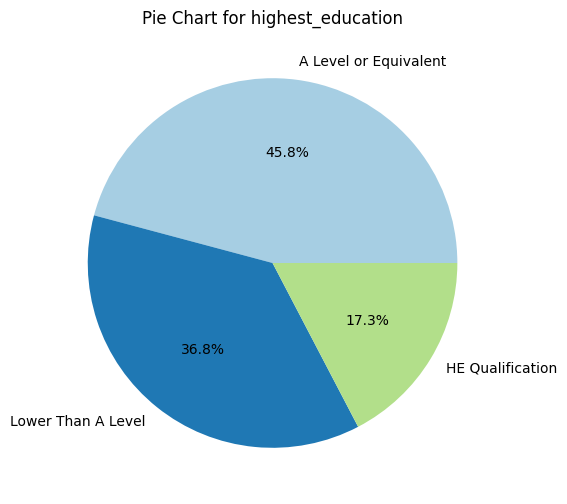

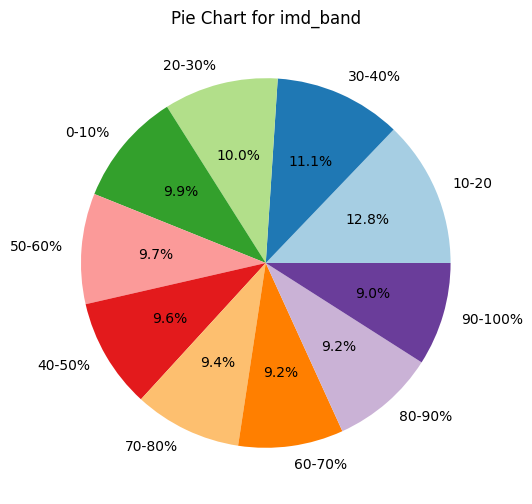

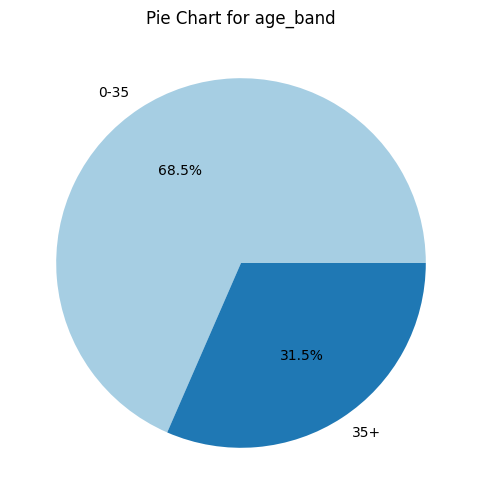

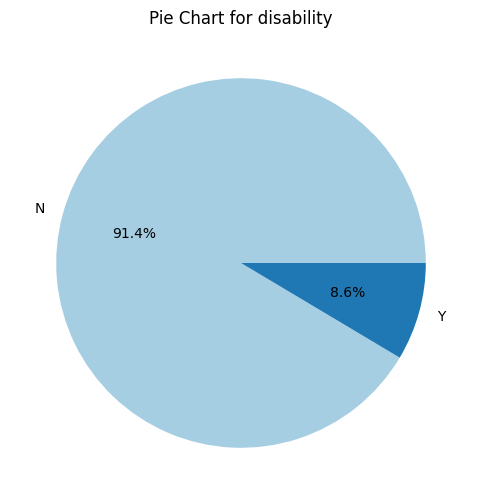

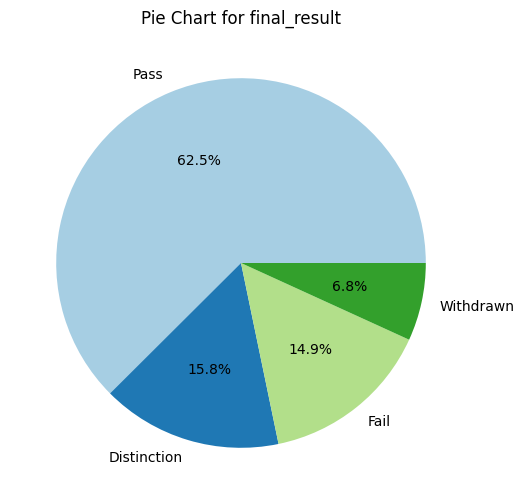

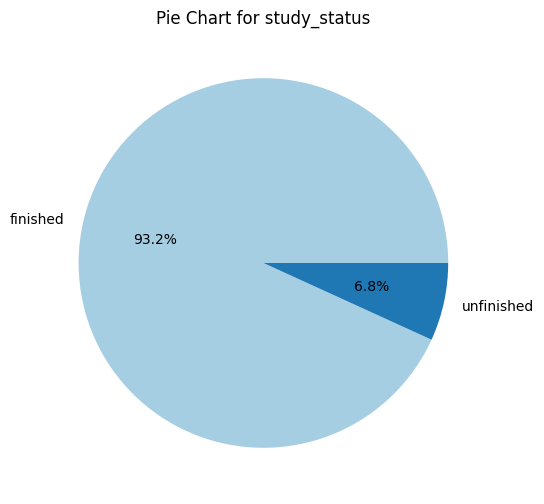

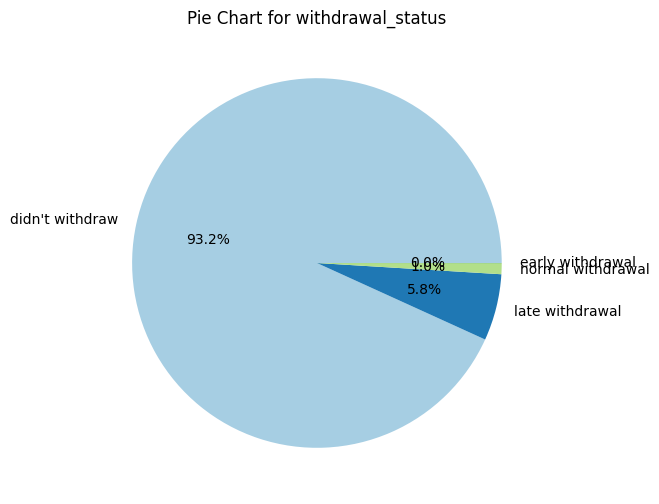

In [55]:
import matplotlib.pyplot as plt

categorical_cols = merged_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    merged_df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired(range(len(merged_df[col].unique()))))
    plt.title(f'Pie Chart for {col}')
    plt.ylabel('')
    plt.show()


## 3.2 Bi-variate Analysis
Now that we understand the distribution for each feature, let's see the realtionships between different features

### 3.2.1 Final Result Analysis

Let's investigate the relationship between final result and different categorical feats

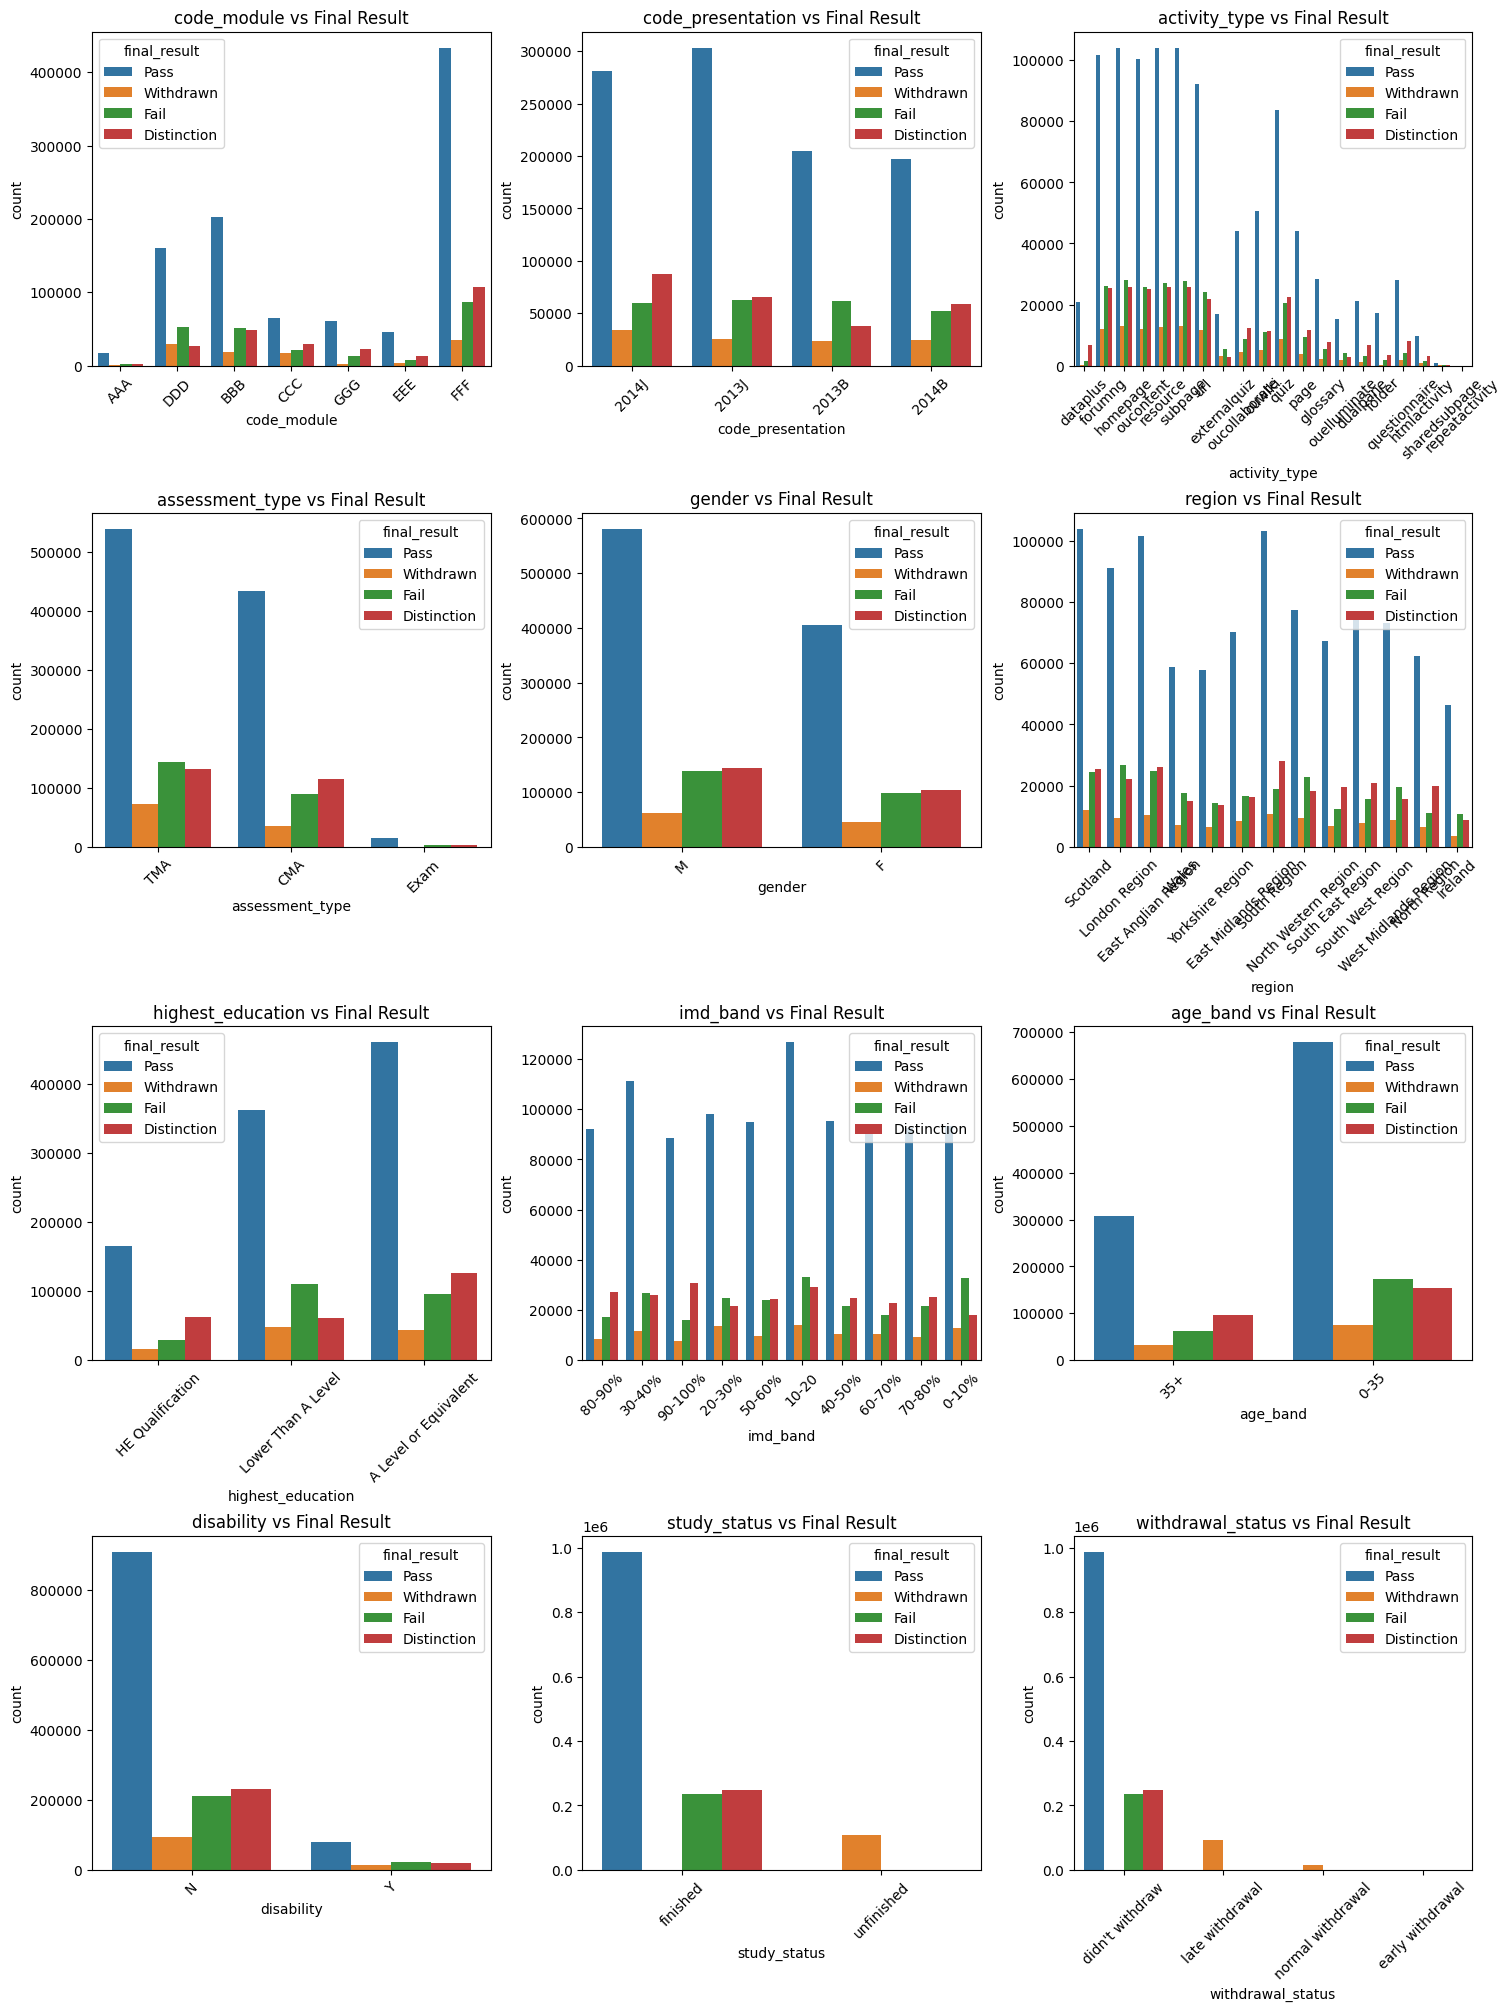

In [ ]:
categorical_cols = merged_df.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop('final_result')

num_cols = 3  # Number of columns in the grid
num_rows = (len(categorical_cols) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='final_result', data=merged_df, ax=axes[i])
    axes[i].set_title(f'{col} vs Final Result')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.show()


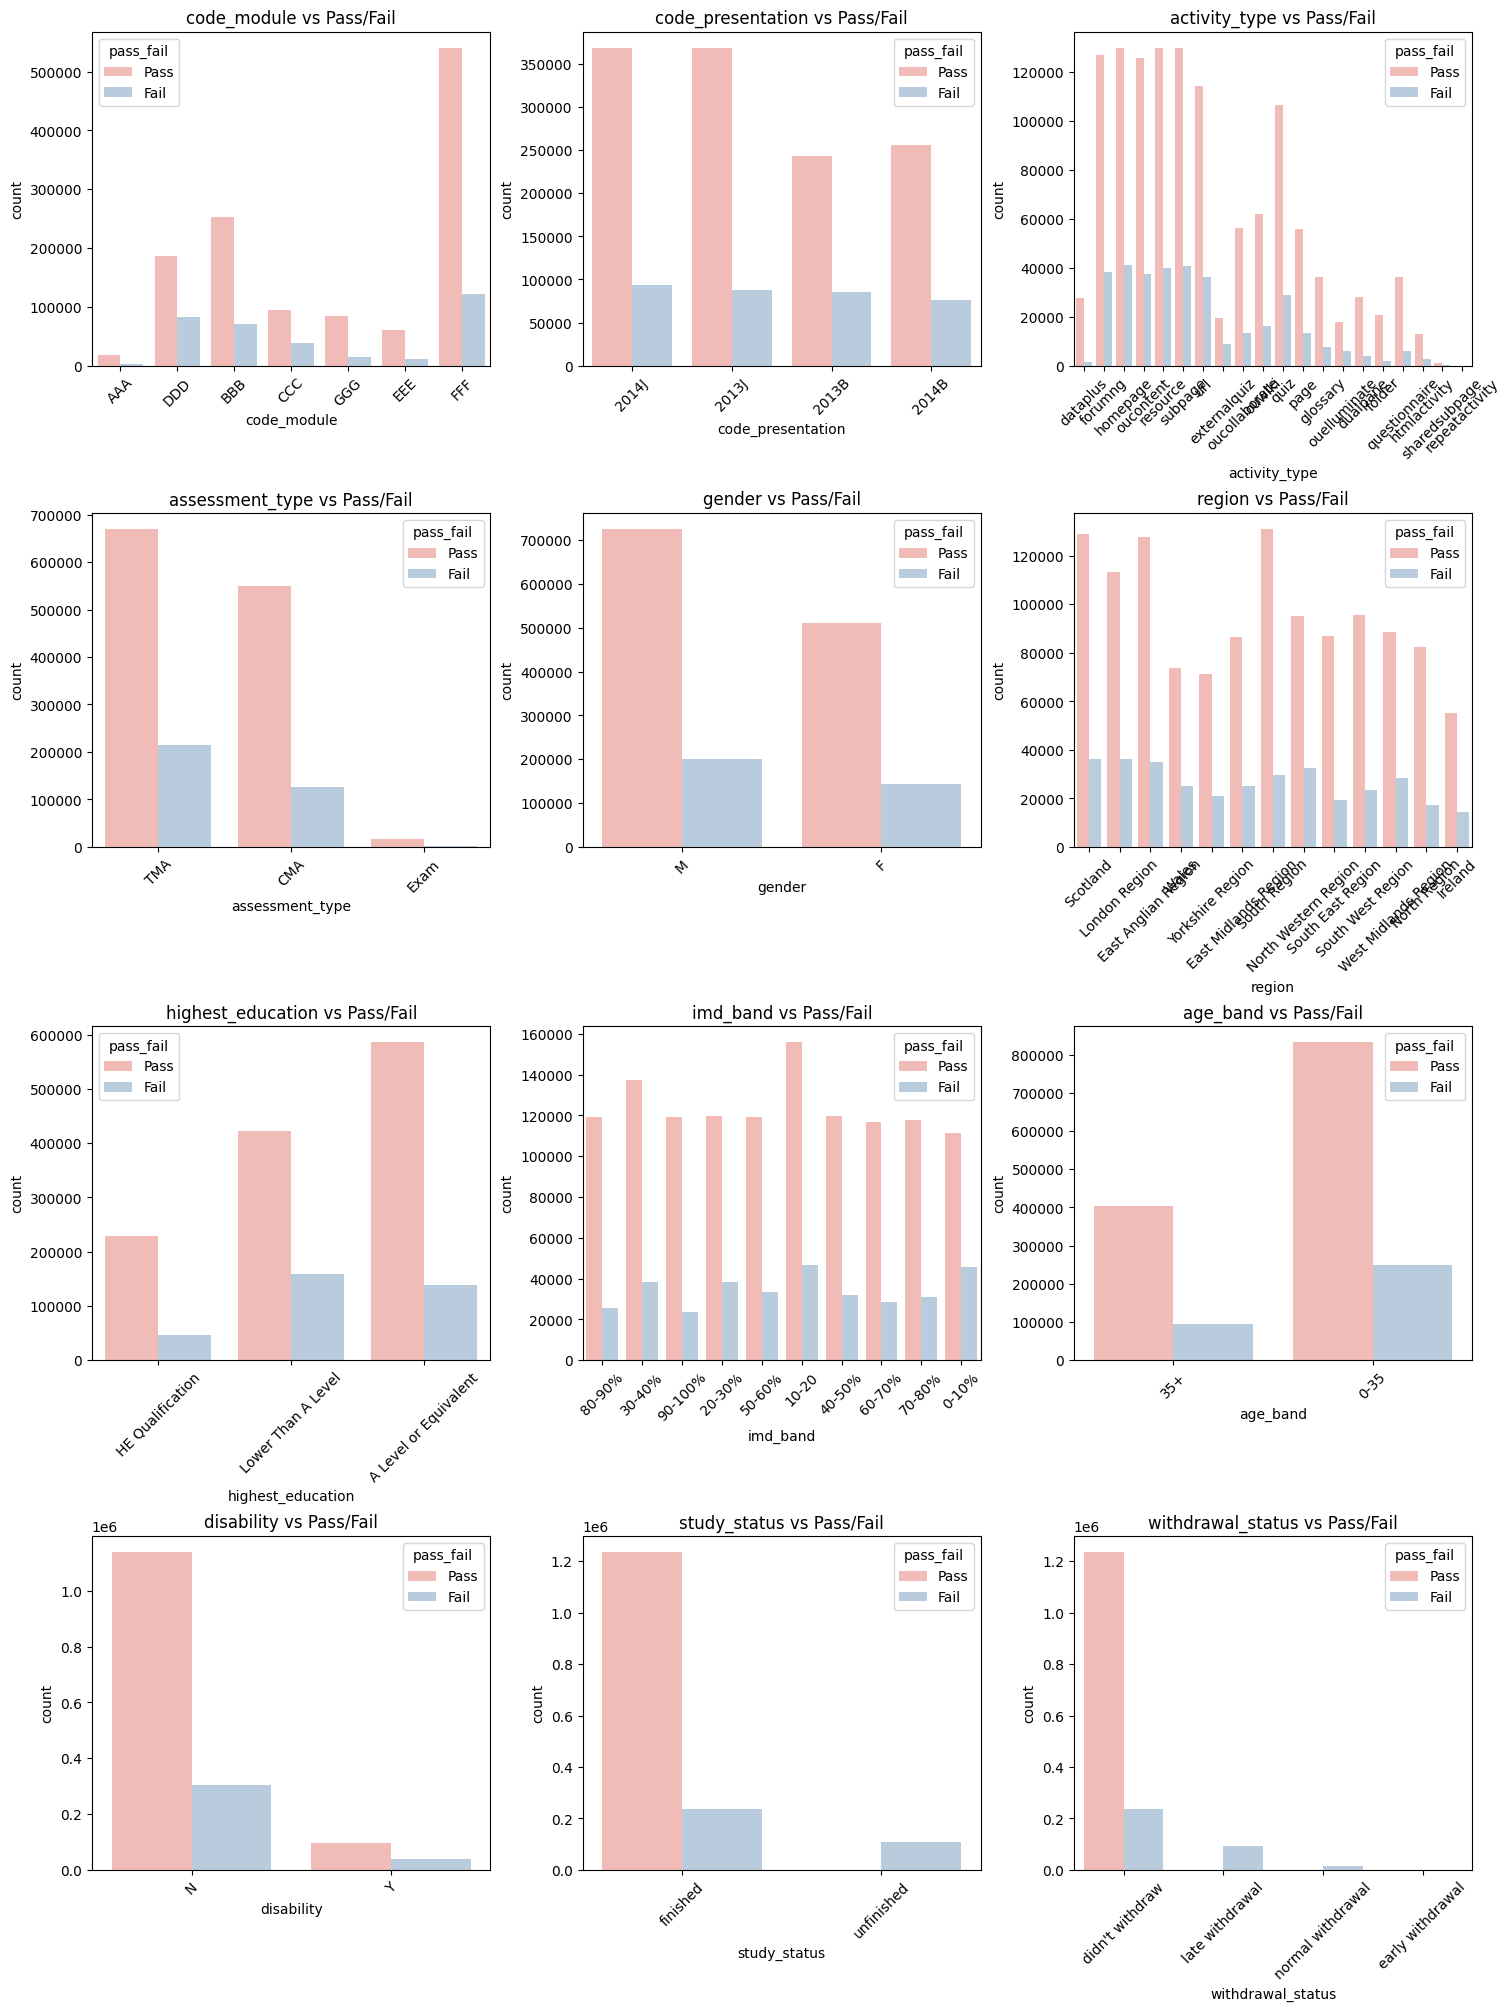

In [ ]:
merged_df['pass_fail'] = merged_df['final_result'].apply(lambda x: 'Pass' if x in ['Pass', 'Distinction'] else 'Fail')

# Now let's investigate the relationship between pass_fail and different categorical feats
categorical_cols = merged_df.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop(['final_result', 'pass_fail'])

num_cols = 3  # Number of columns in the grid
num_rows = (len(categorical_cols) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='pass_fail', data=merged_df, ax=axes[i],palette="Pastel1")
    axes[i].set_title(f'{col} vs Pass/Fail')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.show()
merged_df.drop(['pass_fail'],axis=1,inplace=True) # dropping after investigation

- In these bar charts we can see that each age group has a very similar distribution of overall results. The noticable difference is older students seem to be more likely to pass with distinction.
- gender seems to perform similarly in courses.
- disabled students do not seem to be failing much more frequently, but the withdrawal rate is much higher in students who identify as having a disability
- The percentage of students who either pass or pass with distinction goes up linearly with education level. The percentage of students who fail or withdraw also goes down linearly with education level.
- It is clear in the above charts that students from more deprived areas are failing and withdrawing more.


### How overall clicks affect student score

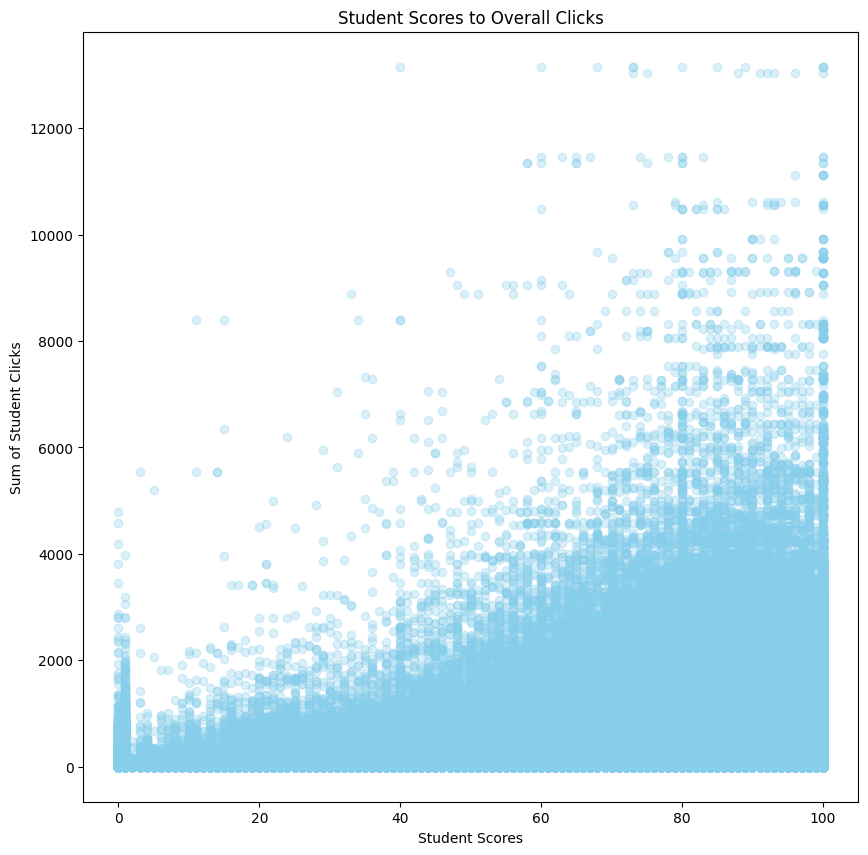

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Student Scores to Overall Clicks')
plt.xlabel("Student Scores")
plt.ylabel("Sum of Student Clicks")
plt.scatter(data=merged_df, y='sum', x='score', alpha=.3,color="skyblue")
plt.show()

We can see that there is a positive correlation between score and sum of clicks for students,  Interestingly there is a spike of scores at 0 where it looks like students with no clicks do better than students with around 5-20 clicks.

### affect of assesment weight on final score

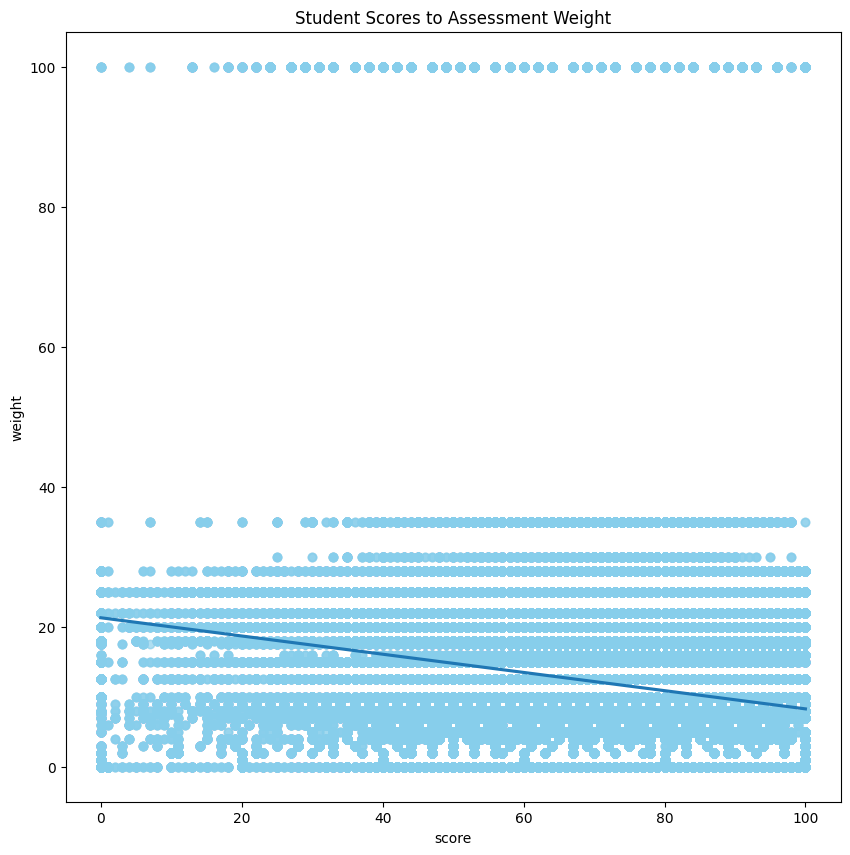

In [ ]:

plt.figure(figsize=(10, 10))
plt.title('Student Scores to Assessment Weight')
plt.xlabel("Student Scores")
plt.ylabel("Assessment Weight")
sns.regplot(data=merged_df, y='weight', x='score', scatter_kws={'alpha':0.3, 'color':"skyblue"})
plt.show()


There is a very weak negative correlation of 0, so It does seem as the assessment weight increases the average score goes down.

### Day submitted effect on student score

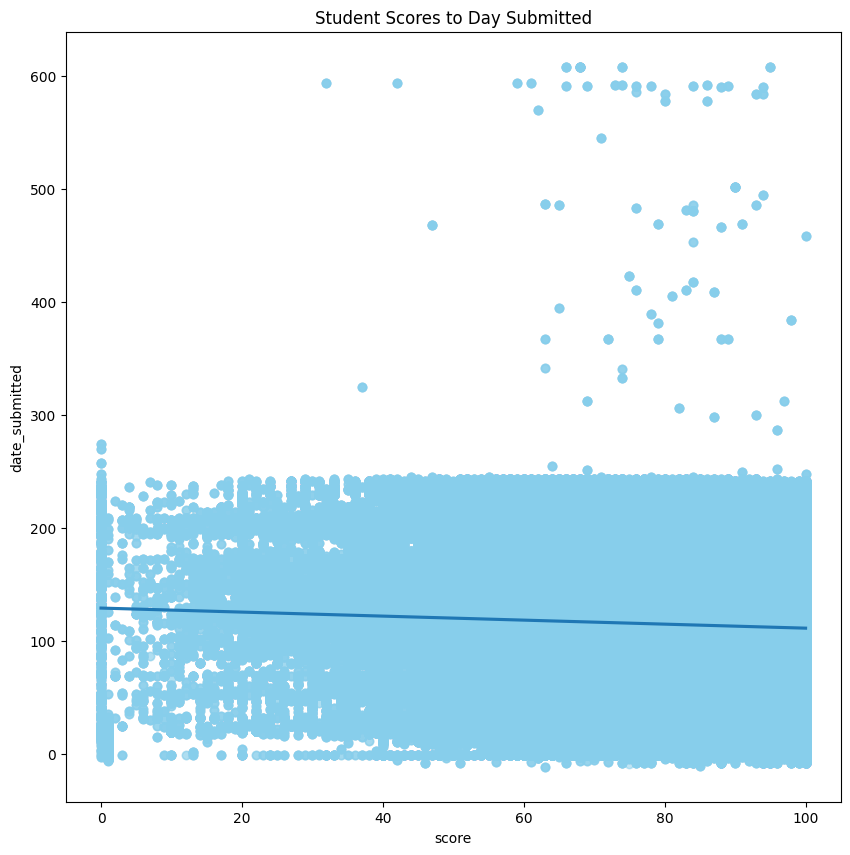

In [ ]:

plt.figure(figsize=(10, 10))
plt.title('Student Scores to Day Submitted')
plt.xlabel("Student Scores")
plt.ylabel("Day Submitted")
sns.regplot(data=merged_df, y='date_submitted', x='score', scatter_kws={'alpha':0.3, 'color':"skyblue"})

plt.show()


According tho the above scatterplot of student submission date to student scores, it seems as the date submitted gets later and later, student scores get somewhat worse. but it's a very weak relation though.

### Does late-submission affect final score?

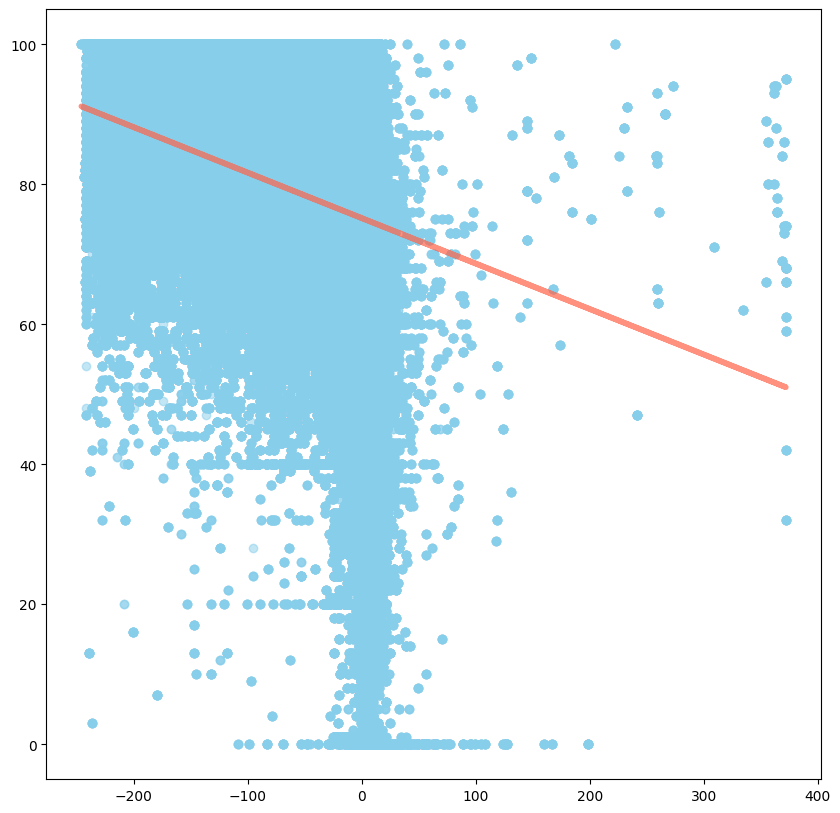

In [49]:
merged_df['days_late'] = merged_df['date_submitted'] - merged_df['date']
lateness_to_score = merged_df['days_late'].astype(int).corr(merged_df['score'].astype(int))

plt.figure(figsize=(10, 10))
x = np.array(merged_df['days_late'].astype(int))
y = np.array(merged_df['score'].astype(int))
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=.5, color='skyblue')
plt.plot(x, m*x + b, color='tomato', lw=4, alpha=.7)
plt.show()
merged_df.drop('days_late',axis=1,inplace=True)

## 3.3 Multivariate Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

  data_subset = grouped_data.get_group(pd_key)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

  data_subset = grouped_data.get_group(pd_key)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 

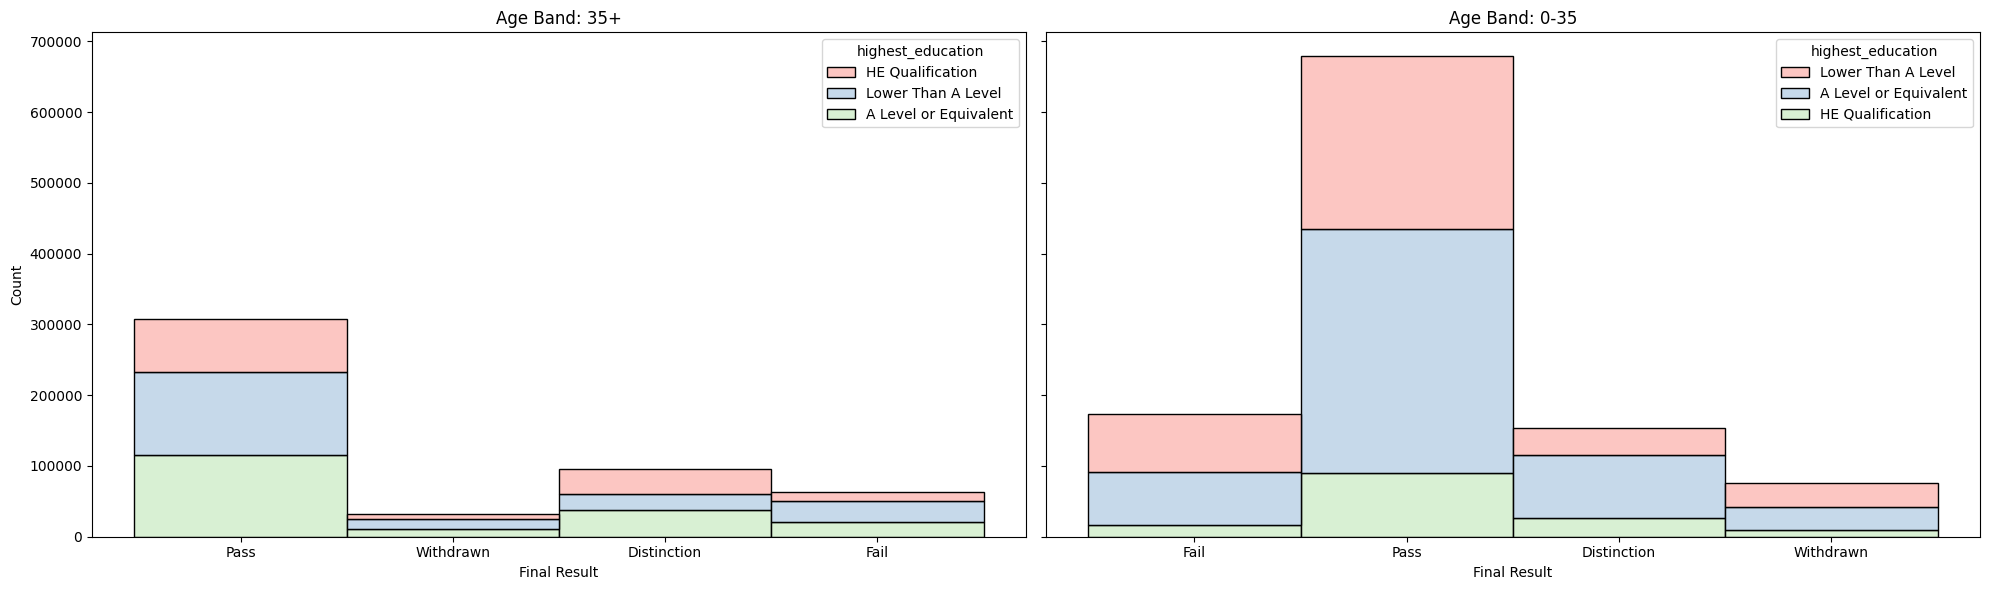

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

age_bands = merged_df['age_band'].unique()
n_age_bands = len(age_bands)
fig, axes = plt.subplots(nrows=1, ncols=n_age_bands, figsize=(20, 6), sharey=True)

for i, age_band in enumerate(age_bands):
    ax = axes[i]
    subset = merged_df[merged_df['age_band'] == age_band]
    sns.histplot(data=subset, x='final_result', hue='highest_education', multiple='stack', bins=len(merged_df['final_result'].unique()), ax=ax, palette='Pastel1')
    ax.set_title(f'Age Band: {age_band}')
    ax.set_xlabel('Final Result')
    if i == 0:
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


In [61]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1579985 entries, 0 to 1579984

Data columns (total 26 columns):

 #   Column                      Non-Null Count    Dtype  

---  ------                      --------------    -----  

 0   id_student                  1579985 non-null  int64  

 1   code_module                 1579985 non-null  object 

 2   code_presentation           1579985 non-null  object 

 3   activity_type               1579985 non-null  object 

 4   sum                         1579985 non-null  int64  

 5   count                       1579985 non-null  int64  

 6   id_assessment               1579985 non-null  int64  

 7   assessment_type             1579985 non-null  object 

 8   date                        1579985 non-null  float64

 9   weight                      1579985 non-null  float64

 10  date_submitted              1579985 non-null  int64  

 11  is_banked                   1579985 non-null  int64  

 12  score                       1579985 non

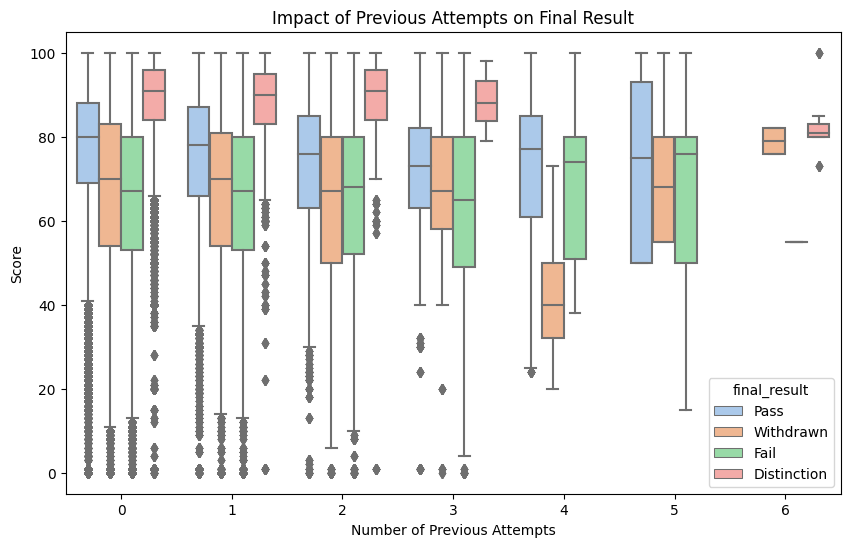

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="num_of_prev_attempts", y="score", hue="final_result", palette='pastel')

plt.title("Impact of Previous Attempts on Final Result")
plt.xlabel("Number of Previous Attempts")
plt.ylabel("Score")

plt.show()


# Conclusion on EDA

| **Category**       | **Observations**                                                                                                                                                                      | **Recommendations**                                                                                                                                               |
|--------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Results**        | - Almost half of the students face negative outcomes (failure or withdrawal). <br> - Most students who complete the course pass, with under a quarter failing and over half passing.  | - Focus efforts on improving retention, as most negative results are due to withdrawals.                                                                           |
| **Regions**        | - All students are from the UK, and regional differences in performance are minor. <br> - The IMD band, not region, is a better predictor of outcomes.                                | - Use British English for courses. <br> - Focus on improving outcomes for students from lower IMD bands, as they tend to perform worse.                            |
| **IMD Bands**      | - Students from more deprived areas have worse results than those from more affluent areas. <br> - Scores generally improve with higher IMD bands, though average scores remain similar. | - Provide targeted support for students in lower IMD bands to improve their results.                                                                               |
| **Education**      | - Most students have A Level or below qualifications. <br> - Higher education correlates with better exam scores.                                                                     | - Avoid using college-level language, and consider adding remedial content to help less-educated students.                                                         |
| **Age Bands**      | - Older students have slightly higher pass rates and distinctions. <br> - Older students also show higher mean scores, possibly due to more experience or education.                  | - Address underrepresentation of older students passing with distinction. <br> - Leverage the experience of older students to boost their performance further.     |
| **Genders**        | - Gender distribution is balanced, and gender does not significantly affect results or scores.                                                                                        | - No specific recommendation needed for gender-related performance.                                                                                               |
| **Disability**     | - Students with disabilities perform worse and have higher withdrawal rates than their peers. <br> - They also score lower on assessments.                                            | - Investigate specific needs (e.g., vision impairment) to improve course accessibility. <br> - Optimize courses for screen readers and assistive technologies.     |
| **Overall**        | - Most students are under 35, from lower economic backgrounds, and with lower education levels. <br> - Many students are likely working while studying, leading to potential time issues. | - Tailor course content and vocabulary to the demographic of younger, less-educated, and potentially employed students.                                            |
| **Assessments**    | - Students perform better on computer-marked assessments. <br> - Higher-weighted assessments tend to have lower grades. <br> - Exam scores improve over time but decrease with delayed submission. | - Encourage students to submit assessments on time or early. <br> - Review tutor-marked assessments for potential improvements in fairness or clarity.              |
| **Clicks**         | - There is a positive association between the number of clicks (engagement) and student performance. <br> - Student interaction with resources increases scores, plateauing around 6 clicks per day. | - Promote student engagement by encouraging frequent interactions with course resources.                                                                           |


# 0. Introduction
Open University is a public British University that also has the highest number of undergraduate students in the UK. It is the largest academic institution in the United Kingdom (and one of the largest in Europe) with 2 Million enrolled students since it is established at 1969. As can be understood from its name, Open University mainly populated by off-campus students.

This dataset belongs to Open University Online Learning Platform (Also called as "Virtual Learning Environment(VLE)") that off-campus students use for accessing the course content, forum discussions, sending assessments and checking out assignment marks etc. It consists of 7 selected courses. Different presentations indicated with letters "B" and "J" after year for semester 2 and semester 1 respectively.

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1880515%2F864453733ec7cb92f003450ed38a2144%2FScreen%20Shot%202020-01-11%20at%208.41.59%20pm.png?generation=1578735825723455&alt=media)



# 1. Data Description
Data columns description
### 1.1 courses.csv
- **code_module**: code name of the module (known as unit code in many universities), which serves as the identifier.

- **code_presentation**: code name of the presentation. It consists of the year and “B” for the presentation starting in February (Corresponds to Semester2) and “J” for the presentation starting in October(Corresponds to Semester1).

- **module_presentation**: Length of the module-presentation in days.

### 1.2 assessments.csv
- **code_module**: code name of the module (known as unit code in many universities), which serves as the identifier.

- **code_presentation**: code name of the presentation. It consists of the year and “B” for the presentation starting in February (Corresponds to Semester2) and “J” for the presentation starting in October(Corresponds to Semester1).

- **id_assessment**: Identification number of the assessment.
  
- **assesment_type**: Three types of assessments exist: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) and Final Exam (Exam).
  
- **date**: Information about the final submission date of the assessment calculated as the number of days since the start of the module-presentation. The starting date of the presentation has number 0 (zero).
  
- **weight**: Weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%; the sum of all other assessments is 100%.

### 1.3 studentAssessment.csv
- **student_assesment**: The identification number of the assessment.
- **id_student**: A unique identification number for the student.
- **date_submitted**: The date of student submission, measured as the number of days since the start of the module presentation.
- **is_banked**: A status flag indicating that the assessment result has been transferred from a previous presentation.
- **score**: The student’s score in this assessment. The range is from 0 to 100. The score lower than 40 is interpreted as Fail. The marks are in the range from 0 to 100.


### 1.4 studentInfo.csv
- **code_module**: code name of the module (known as unit code in many universities), which serves as the identifier.

- **code_presentation**: code name of the presentation. It consists of the year and “B” for the presentation starting in February (Corresponds to Semester2) and “J” for the presentation starting in October(Corresponds to Semester1).

- **id_student**: A unique identification number for the student.
- **gender**: gender of a student
- **region**: Identifies the geographic region, where the student lived while taking the module-presentation.
- **highest_education**: Highest student education level on entry to the module presentation.
- **imd_band**: Specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.
- **age_band**: Band of the student’s age.
- **num_of_prev_attempts**: The number times the student has attempted this module.
- **studied_credits**: The total number of credits for the modules the student is currently studying.
### 1.5 studentRegistration.csv
- **date_registration**: The date of student’s registration on the module presentation, this is the number of days measured relative to the start of the module-presentation. Students, who completed the course have this field empty. Students who unregistered have Withdrawal as the value of the final_result column in the studentInfo.csv file.
- **date_unregistration**: Date of student unregistration from the module presentation, this is the number of days measured relative to the start of the module-presentation. Students, who completed the course have this field empty. Students who unregistered have Withdrawal as the value of the final_result column in the studentInfo.csv file.
### 1.6 studentVle.csv
- **id_site**: An identification number for the VLE material.
- **date**: The date of student’s interaction with the material measured as the number of days since the start of the module
- **sum_click**: The number of times a student interacts with the material in that day.
### 1.7 vle.csv
- **activity_type**: The role associated with the module material.
- **week_from**: The week from which the material is planned to be used.
- **week_to**: Week until which the material is planned to be used.


# 2. Importing Modules and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("../input/merged.csv", index_col=0)

In [3]:
df.head()

,id_student,code_module,code_presentation,activity_type,sum,count,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score,date_registration,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length,study_status,withdrawal_status
0,6516,AAA,2014J,dataplus,21,4,1758,TMA,19.0,10.0,17,0,60.0,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,269,finished,didn't withdraw
1,6516,AAA,2014J,dataplus,21,4,1759,TMA,54.0,20.0,51,0,48.0,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,269,finished,didn't withdraw
2,6516,AAA,2014J,dataplus,21,4,1760,TMA,117.0,20.0,116,0,63.0,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,269,finished,didn't withdraw
3,6516,AAA,2014J,dataplus,21,4,1761,TMA,166.0,20.0,164,0,61.0,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,269,finished,didn't withdraw
4,6516,AAA,2014J,dataplus,21,4,1762,TMA,215.0,30.0,210,0,77.0,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,269,finished,didn't withdraw


In [4]:
df.describe()

,id_student,sum,count,id_assessment,date,weight,date_submitted,is_banked,score,date_registration,num_of_prev_attempts,studied_credits,module_presentation_length
count,1.500683e+06,1.500683e+06,1.500683e+06,1.500683e+06,1.500683e+06,1.500683e+06,1.500683e+06,1.500683e+06,1.500683e+06,1.500683e+06,1.500683e+06,1.500683e+06,1.500683e+06
mean,7.109235e+05,2.109969e+02,5.500902e+01,2.769969e+04,1.356615e+02,1.127252e+01,1.154580e+02,7.282018e-03,7.638217e+01,-6.715035e+01,1.417648e-01,7.826802e+01,2.554769e+02
std,5.609607e+05,4.640620e+02,8.499146e+01,8.577082e+03,7.937158e+01,1.404301e+01,7.063811e+01,8.502349e-02,1.806847e+01,4.683449e+01,4.399806e-01,3.677672e+01,1.360531e+01
min,6.516000e+03,1.000000e+00,1.000000e+00,1.752000e+03,1.200000e+01,0.000000e+00,-1.100000e+01,0.000000e+00,0.000000e+00,-3.110000e+02,0.000000e+00,3.000000e+01,2.340000e+02
25%,5.036680e+05,1.100000e+01,7.000000e+00,2.428700e+04,5.400000e+01,0.000000e+00,5.100000e+01,0.000000e+00,6.700000e+01,-9.500000e+01,0.000000e+00,6.000000e+01,2.400000e+02
50%,5.838240e+05,4.800000e+01,2.400000e+01,3.071600e+04,1.310000e+02,9.000000e+00,1.160000e+02,0.000000e+00,8.000000e+01,-5.400000e+01,0.000000e+00,6.000000e+01,2.620000e+02
75%,6.350430e+05,1.990000e+02,6.700000e+01,3.488700e+04,2.220000e+02,1.800000e+01,1.720000e+02,0.000000e+00,8.900000e+01,-2.900000e+01,0.000000e+00,9.000000e+01,2.680000e+02
max,2.698588e+06,1.315400e+04,1.727000e+03,3.744300e+04,2.610000e+02,1.000000e+02,6.080000e+02,1.000000e+00,1.000000e+02,1.240000e+02,6.000000e+00,6.300000e+02,2.690000e+02


In [5]:
df.shape

(1500683, 26)

In [6]:
df.isnull().sum()

id_student                    0
code_module                   0
code_presentation             0
activity_type                 0
sum                           0
count                         0
id_assessment                 0
assessment_type               0
date                          0
weight                        0
date_submitted                0
is_banked                     0
score                         0
date_registration             0
gender                        0
region                        0
highest_education             0
imd_band                      0
age_band                      0
num_of_prev_attempts          0
studied_credits               0
disability                    0
final_result                  0
module_presentation_length    0
study_status                  0
withdrawal_status             0
dtype: int64

# 4. Feature Engineering

In [7]:
df['assessment_engagement_score'] = df['sum'] * df['count']
df['submission_timeliness'] = df['date_submitted'] - df['date']
df['score_per_weight'] = df['score'] / (df['weight'] + 1)
df['module_engagement_rate'] = df['sum'] / df['module_presentation_length']

In [8]:
df['repeat_student'] = df['num_of_prev_attempts'].apply(lambda x: 1 if x > 0 else 0)
df['performance_by_registration'] = df['score'] / (df['date_registration'] + 1)
df['banked_assessment_ratio'] = df.groupby('id_student')['is_banked'].transform(lambda x: x.sum() / x.count())
df['time_since_registration'] = df['date'] - df['date_registration']
df['weighted_engagement'] = df['assessment_engagement_score'] * df['weight']
df['cumulative_score'] = df.groupby('id_student')['score'].cumsum()

In [9]:
df['engagement_consistency'] = df.groupby('id_student')['sum'].transform(np.std)
df['learning_pace'] = df.groupby('id_student')['date_submitted'].diff().fillna(0)
df['engagement_dropoff'] = df.groupby('id_student')['sum'].transform(lambda x: (x.max() - x.min()) / (x.count() - 1) if x.count() > 1 else 0)
df['activity_diversity'] = df.groupby('id_student')['activity_type'].transform('nunique')

In [10]:
df['improvement_rate'] = df.groupby('id_student')['score'].transform(lambda x: (x.iloc[-1] - x.iloc[0]) / (x.count() - 1) if x.count() > 1 else 0)

## 4.1 Extracting Study Method Feature

In [11]:
def determine_study_method(activity_type_counts):
    threshold = 5
    
    poor_conditions = (
        activity_type_counts.get('homepage', 0) < threshold and
        activity_type_counts.get('subpage', 0) < threshold and
        activity_type_counts.get('resource', 0) < threshold and
        activity_type_counts.get('forumng', 0) < threshold and
        activity_type_counts.get('oucontent', 0) < threshold and
        activity_type_counts.get('url', 0) < threshold and
        activity_type_counts.get('quiz', 0) < threshold and
        activity_type_counts.get('ouwiki', 0) < threshold and
        activity_type_counts.get('oucollaborate', 0) < threshold and
        activity_type_counts.get('page', 0) < threshold and
        activity_type_counts.get('glossary', 0) < threshold and
        activity_type_counts.get('questionnaire', 0) < threshold and
        activity_type_counts.get('dualpane', 0) < threshold and
        activity_type_counts.get('dataplus', 0) < threshold and
        activity_type_counts.get('externalquiz', 0) < threshold and
        activity_type_counts.get('ouelluminate', 0) < threshold and
        activity_type_counts.get('folder', 0) < threshold and
        activity_type_counts.get('htmlactivity', 0) < threshold and
        activity_type_counts.get('sharedsubpage', 0) < threshold and
        activity_type_counts.get('repeatactivity', 0) < threshold
    )
    
    
    interactive_conditions = (
        (activity_type_counts.get('quiz', 0) > threshold and
        activity_type_counts.get('externalquiz', 0) > threshold) or
        activity_type_counts.get('repeatactivity', 0) > threshold or
        activity_type_counts.get('questionnaire', 0) > threshold
    )
    
    resource_based_conditions = (
        activity_type_counts.get('resource', 0) > threshold or
        activity_type_counts.get('homepage', 0) > threshold or
        activity_type_counts.get('folder', 0) > threshold or
        activity_type_counts.get('subpage', 0) > threshold or
        activity_type_counts.get('url', 0) > threshold or
        activity_type_counts.get('page', 0) > threshold or
        activity_type_counts.get('glossary', 0) > threshold or
        activity_type_counts.get('dataplus', 0) > threshold or
        activity_type_counts.get('dualpane', 0) > threshold or
        activity_type_counts.get('htmlactivity', 0) > threshold
    )
    
    collaborative_conditions = (
        activity_type_counts.get('ouelluminate', 0) > threshold or
        activity_type_counts.get('ouwiki', 0) > threshold or
        activity_type_counts.get('sharedsubpage', 0) > threshold or
        activity_type_counts.get('oucontent', 0) > threshold or
        activity_type_counts.get('page', 0) > threshold or
        activity_type_counts.get('oucollaborate', 0) > threshold
    )
    
    
    if poor_conditions and not (collaborative_conditions or interactive_conditions or resource_based_conditions):
        return 'Offline Content'    
    elif collaborative_conditions and not interactive_conditions:
        return 'Collaborative'
    elif resource_based_conditions and not (collaborative_conditions or interactive_conditions):
        return 'Resource-Based'
    elif interactive_conditions:
        return 'Interactive'
    else:
        return 'Informational'

activity_type_counts = df.groupby('id_student')['activity_type'].value_counts().unstack().fillna(0)

activity_type_counts['study_method_preference'] = activity_type_counts.apply(determine_study_method, axis=1)

if 'study_method_preference' in df.columns:
    df = df.drop(columns=['study_method_preference'])

df = df.merge(activity_type_counts[['study_method_preference']], on='id_student', how='left')

df.head()


,id_student,code_module,code_presentation,activity_type,sum,count,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score,date_registration,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length,study_status,withdrawal_status,assessment_engagement_score,submission_timeliness,score_per_weight,module_engagement_rate,repeat_student,performance_by_registration,banked_assessment_ratio,time_since_registration,weighted_engagement,cumulative_score,engagement_consistency,learning_pace,engagement_dropoff,activity_diversity,improvement_rate,study_method_preference
0,6516,AAA,2014J,dataplus,21,4,1758,TMA,19.0,10.0,17,0,60.0,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,269,finished,didn't withdraw,84,-2.0,5.454545,0.078067,0,-1.176471,0.0,71.0,840.0,60.0,491.833818,0.0,43.647059,7,0.5,Informational
1,6516,AAA,2014J,dataplus,21,4,1759,TMA,54.0,20.0,51,0,48.0,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,269,finished,didn't withdraw,84,-3.0,2.285714,0.078067,0,-0.941176,0.0,106.0,1680.0,108.0,491.833818,34.0,43.647059,7,0.5,Informational
2,6516,AAA,2014J,dataplus,21,4,1760,TMA,117.0,20.0,116,0,63.0,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,269,finished,didn't withdraw,84,-1.0,3.000000,0.078067,0,-1.235294,0.0,169.0,1680.0,171.0,491.833818,65.0,43.647059,7,0.5,Informational
3,6516,AAA,2014J,dataplus,21,4,1761,TMA,166.0,20.0,164,0,61.0,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,269,finished,didn't withdraw,84,-2.0,2.904762,0.078067,0,-1.196078,0.0,218.0,1680.0,232.0,491.833818,48.0,43.647059,7,0.5,Informational
4,6516,AAA,2014J,dataplus,21,4,1762,TMA,215.0,30.0,210,0,77.0,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,269,finished,didn't withdraw,84,-5.0,2.483871,0.078067,0,-1.509804,0.0,267.0,2520.0,309.0,491.833818,46.0,43.647059,7,0.5,Informational


In [12]:
df.study_method_preference.value_counts()

study_method_preference
Collaborative      739761
Interactive        495220
Offline Content    140222
Informational       99913
Resource-Based      25567
Name: count, dtype: int64

## 4.2 Aggregating students based on id
In this step, we group the dataset by id_student to aggregate various features. This approach reduces dimensionality and mitigates the effects of repeated entries caused by multiple assessments and different code modules or presentations for each student. By applying appropriate aggregation functions to each feature, we ensure that our analysis focuses on meaningful student-level metrics rather than on redundant or excessively detailed records.\


In [13]:
summary_columns = {
    'code_module': lambda x: x.mode()[0],
    'code_presentation': lambda x: x.mode()[0],
    'activity_type': lambda x: x.mode()[0],
    'sum': 'sum',
    'count': 'sum',
    'assessment_type': lambda x: x.mode()[0],
    'date': 'mean',
    'weight': 'mean',
    'date_submitted':'mean',
    'is_banked': lambda x: x.mode()[0],
    'score':'mean',
    'date_registration':'mean',
    'gender': lambda x: x.mode()[0],
    'region': lambda x: x.mode()[0],
    'highest_education': lambda x: x.mode()[0],
    'imd_band' : lambda x: x.mode()[0],
    'age_band': lambda x: x.mode()[0],
    'num_of_prev_attempts': 'mean',
    'studied_credits': 'mean',
    'disability': lambda x: x.mode()[0],
    'final_result': lambda x: x.mode()[0],
    'module_presentation_length': 'mean',
    'study_status': lambda x: x.mode()[0],
    'withdrawal_status': lambda x: x.mode()[0],
    'assessment_engagement_score': 'mean',
    'submission_timeliness': 'mean',
    'score_per_weight': 'mean',
    'module_engagement_rate':'mean',
    'repeat_student': 'mean',
    'performance_by_registration': 'mean',
    'banked_assessment_ratio': 'mean',
    'time_since_registration': 'mean',
    'weighted_engagement': 'mean',
    'cumulative_score': 'mean',
    'engagement_consistency': 'mean',
    'learning_pace': 'mean',
    'engagement_dropoff': 'mean',
    'activity_diversity': 'mean',
    'improvement_rate': 'mean',
    'study_method_preference': lambda x: x.mode()[0]
}

# Group by 'id_student' and aggregate
summary_df = df.groupby('id_student').agg(summary_columns).reset_index()

In [14]:
ids = summary_df["id_student"]
study_method = summary_df["study_method_preference"]

In [15]:
columns_to_work_with = ['activity_type','sum','count','score','gender','region','highest_education','imd_band','age_band'
           ,'num_of_prev_attempts','disability','final_result','study_status','withdrawal_status','assessment_engagement_score'
           ,'submission_timeliness','score_per_weight','module_engagement_rate','repeat_student','performance_by_registration'
           ,'weighted_engagement','cumulative_score','engagement_consistency','learning_pace','engagement_dropoff'
           ,'activity_diversity','improvement_rate']

In [16]:
len(columns_to_work_with)

27

In [17]:
summary_df = summary_df[columns_to_work_with]

In [18]:
summary_df.shape

(22445, 27)

## 5. Scaling and Encoding

In [19]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

numerical_cols = summary_df.select_dtypes(include=[np.number]).columns

numerical_data = summary_df[numerical_cols].copy()

numerical_data.replace([np.inf, -np.inf], np.nan, inplace=True)
numerical_data.fillna(0, inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numerical_data)

scaled_data_df = pd.DataFrame(scaled_data, columns=numerical_cols)
#scaled_data_df.drop(columns='id_student', inplace=True)
scaled_data_df.head()

,sum,count,score,num_of_prev_attempts,assessment_engagement_score,submission_timeliness,score_per_weight,module_engagement_rate,repeat_student,performance_by_registration,weighted_engagement,cumulative_score,engagement_consistency,learning_pace,engagement_dropoff,activity_diversity,improvement_rate
0,0.046918,0.055064,0.618000,0.000000,0.027572,0.584637,0.032258,0.202552,0.000000,0.601644,0.038912,0.073336,0.125758,0.470793,0.097390,0.400000,0.644654
1,0.006647,0.015226,0.873077,0.051282,0.001379,0.544713,0.070656,0.026109,0.307692,0.601942,0.001298,0.116558,0.018097,0.349810,0.013270,0.533333,0.623966
2,0.015699,0.016291,0.820000,0.000000,0.004209,0.586641,0.043282,0.079065,0.000000,0.606112,0.005940,0.084399,0.049563,0.489130,0.042164,0.333333,0.633268
3,0.002162,0.003911,0.825000,0.333333,0.000268,0.599917,0.286206,0.017870,1.000000,0.597892,0.000118,0.058792,0.008018,0.363658,0.009982,0.266667,0.567693
4,0.024475,0.040586,0.737500,0.000000,0.003367,0.593967,0.087350,0.057421,0.000000,0.605095,0.002970,0.160185,0.046306,0.420277,0.020365,0.466667,0.623440


In [20]:
categorical_cols = summary_df.select_dtypes(exclude=[np.number]).columns
categorical_data = summary_df[categorical_cols]

merged_data = pd.concat([scaled_data_df, categorical_data], axis=1)
merged_data.head()

,sum,count,score,num_of_prev_attempts,assessment_engagement_score,submission_timeliness,score_per_weight,module_engagement_rate,repeat_student,performance_by_registration,weighted_engagement,cumulative_score,engagement_consistency,learning_pace,engagement_dropoff,activity_diversity,improvement_rate,activity_type,gender,region,highest_education,imd_band,age_band,disability,final_result,study_status,withdrawal_status
0,0.046918,0.055064,0.618000,0.000000,0.027572,0.584637,0.032258,0.202552,0.000000,0.601644,0.038912,0.073336,0.125758,0.470793,0.097390,0.400000,0.644654,dataplus,M,Scotland,HE Qualification,80-90%,55<=,N,Pass,finished,didn't withdraw
1,0.006647,0.015226,0.873077,0.051282,0.001379,0.544713,0.070656,0.026109,0.307692,0.601942,0.001298,0.116558,0.018097,0.349810,0.013270,0.533333,0.623966,forumng,M,London Region,HE Qualification,30-40%,55<=,N,Withdrawn,unfinished,late withdrawal
2,0.015699,0.016291,0.820000,0.000000,0.004209,0.586641,0.043282,0.079065,0.000000,0.606112,0.005940,0.084399,0.049563,0.489130,0.042164,0.333333,0.633268,forumng,M,East Anglian Region,HE Qualification,90-100%,55<=,N,Pass,finished,didn't withdraw
3,0.002162,0.003911,0.825000,0.333333,0.000268,0.599917,0.286206,0.017870,1.000000,0.597892,0.000118,0.058792,0.008018,0.363658,0.009982,0.266667,0.567693,forumng,F,East Anglian Region,Lower Than A Level,20-30%,0-35,N,Fail,finished,didn't withdraw
4,0.024475,0.040586,0.737500,0.000000,0.003367,0.593967,0.087350,0.057421,0.000000,0.605095,0.002970,0.160185,0.046306,0.420277,0.020365,0.466667,0.623440,forumng,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,N,Pass,finished,didn't withdraw


In [21]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_cols = merged_data.select_dtypes(include="object").columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # To keep other columns unchanged
)

final_data_encoded = preprocessor.fit_transform(merged_data)

feature_names = (preprocessor
                 .named_transformers_['cat']
                 .get_feature_names_out(categorical_cols))

all_feature_names = feature_names.tolist() + [col for col in merged_data.columns if col not in categorical_cols]

final_data_encoded_df = pd.DataFrame(final_data_encoded, columns=all_feature_names)

final_data_encoded_df.info()


<class 'pandas.core.frame.DataFrame'>

RangeIndex: 22445 entries, 0 to 22444

Data columns (total 71 columns):

 #   Column                                         Non-Null Count  Dtype  

---  ------                                         --------------  -----  

 0   activity_type_dataplus                         22445 non-null  float64

 1   activity_type_dualpane                         22445 non-null  float64

 2   activity_type_externalquiz                     22445 non-null  float64

 3   activity_type_folder                           22445 non-null  float64

 4   activity_type_forumng                          22445 non-null  float64

 5   activity_type_glossary                         22445 non-null  float64

 6   activity_type_homepage                         22445 non-null  float64

 7   activity_type_quiz                             22445 non-null  float64

 8   activity_type_resource                         22445 non-null  float64

 9   gender_F                            

# 6. Clustering students 

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_score = -1
best_k = 0
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(final_data_encoded_df)
    score = silhouette_score(final_data_encoded_df, labels)
    print(f'For k = {k}, Silhouette Score = {score}')
    if score > best_score:
        best_score = score
        best_k = k

print(f'Best k: {best_k}, Best Silhouette Score: {best_score}')

For k = 2, Silhouette Score = 0.08934885167822136

For k = 3, Silhouette Score = 0.11211729730742254

For k = 4, Silhouette Score = 0.09496521114534083

For k = 5, Silhouette Score = 0.09588041813592184

Best k: 3, Best Silhouette Score: 0.11211729730742254


In [23]:
kmeans = KMeans(n_clusters=4, random_state=42)
final_labels = kmeans.fit_predict(final_data_encoded_df)

final_data_encoded_df['kmeans_cluster'] = final_labels

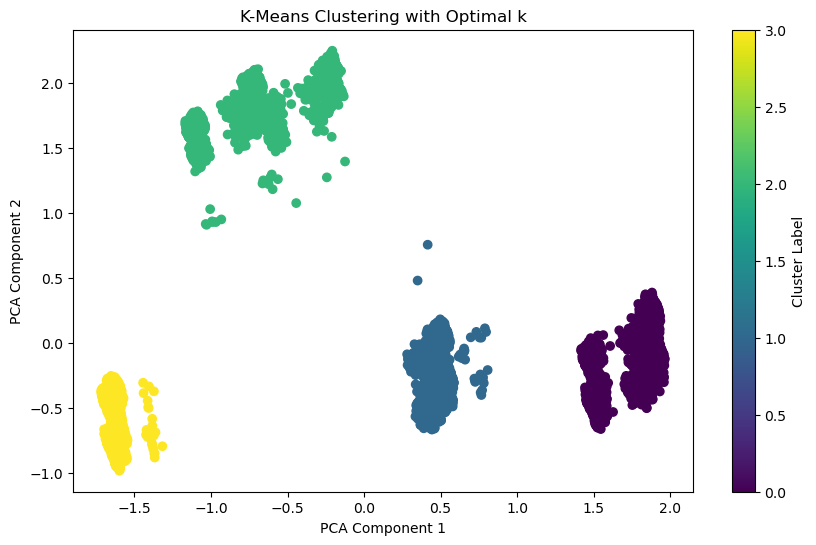

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca_data = pca.fit_transform(final_data_encoded_df)

plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=final_labels, cmap='viridis')
plt.title('K-Means Clustering with Optimal k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [25]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(final_data_encoded_df)
    inertia.append(kmeans.inertia_)

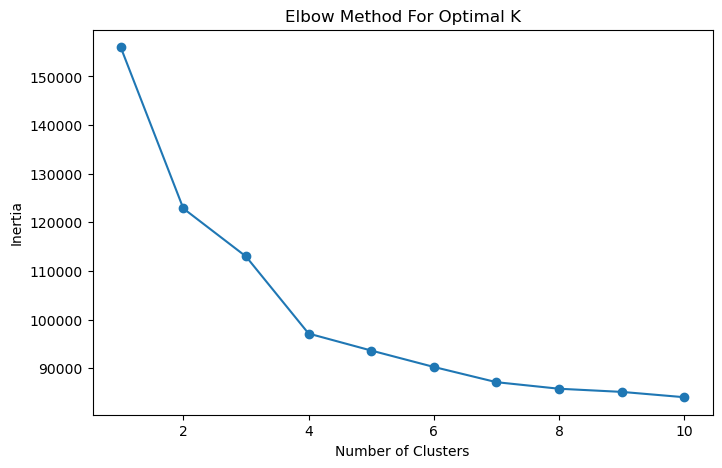

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

In [27]:
final_data_encoded_df['kmeans_cluster'].value_counts()

kmeans_cluster
1    6576
3    6549
0    5787
2    3533
Name: count, dtype: int64

In [28]:
final_data_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 22445 entries, 0 to 22444

Data columns (total 72 columns):

 #   Column                                         Non-Null Count  Dtype  

---  ------                                         --------------  -----  

 0   activity_type_dataplus                         22445 non-null  float64

 1   activity_type_dualpane                         22445 non-null  float64

 2   activity_type_externalquiz                     22445 non-null  float64

 3   activity_type_folder                           22445 non-null  float64

 4   activity_type_forumng                          22445 non-null  float64

 5   activity_type_glossary                         22445 non-null  float64

 6   activity_type_homepage                         22445 non-null  float64

 7   activity_type_quiz                             22445 non-null  float64

 8   activity_type_resource                         22445 non-null  float64

 9   gender_F                            

_____________________

## Mahmoud - Trying to use engagement columns only in clustering

In [29]:
engagement_columns = [
    'assessment_engagement_score',
    'module_engagement_rate',
    'weighted_engagement',
    'engagement_consistency',
    'learning_pace',
    'engagement_dropoff',
    'activity_diversity'
]



In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_score = -1
best_k = 0
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(final_data_encoded_df[engagement_columns])
    score = silhouette_score(final_data_encoded_df[engagement_columns], labels)
    print(f'For k = {k}, Silhouette Score = {score}')
    if score > best_score:
        best_score = score
        best_k = k

print(f'Best k: {best_k}, Best Silhouette Score: {best_score}')

For k = 2, Silhouette Score = 0.47340922125446766

For k = 3, Silhouette Score = 0.4538435719553629

For k = 4, Silhouette Score = 0.4041254246147025

For k = 5, Silhouette Score = 0.41083793075504954

For k = 6, Silhouette Score = 0.36195552776789314

For k = 7, Silhouette Score = 0.3573954203489294

Best k: 2, Best Silhouette Score: 0.47340922125446766


In [52]:
kmeans = KMeans(n_clusters=3, random_state=42)
final_labels = kmeans.fit_predict(final_data_encoded_df[engagement_columns])

final_data_encoded_df['kmeans_cluster'] = final_labels

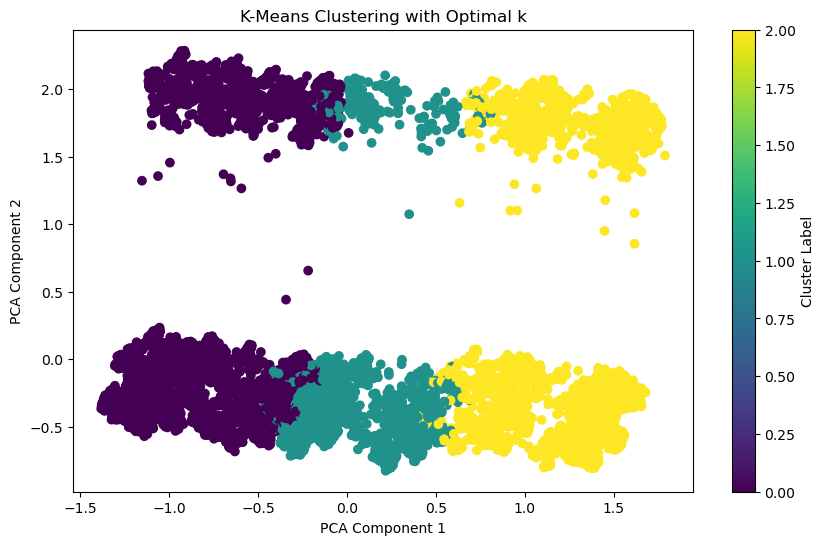

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca_data = pca.fit_transform(final_data_encoded_df)

plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=final_labels, cmap='viridis')
plt.title('K-Means Clustering with Optimal k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [54]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(final_data_encoded_df[engagement_columns])
    inertia.append(kmeans.inertia_)

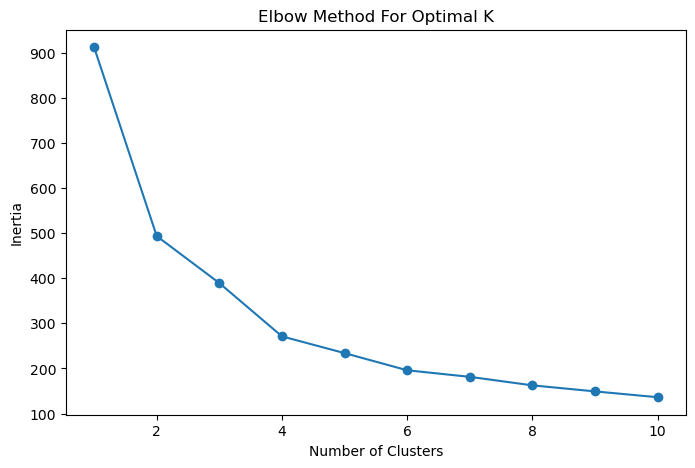

In [55]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

In [56]:
final_data_encoded_df['kmeans_cluster'].value_counts()

kmeans_cluster
0    11239
2     7193
1     4013
Name: count, dtype: int64

In [57]:
for col in engagement_columns:
    print(pd.DataFrame(final_data_encoded_df.groupby('kmeans_cluster')[col].describe()))


                  count      mean       std       min       25%       50%  \

kmeans_cluster                                                              

0               11239.0  0.007496  0.012181  0.000007  0.001182  0.003455   

1                4013.0  0.043175  0.067409  0.000880  0.011777  0.022565   

2                7193.0  0.002472  0.006136  0.000000  0.000191  0.000683   



                     75%       max  

kmeans_cluster                      

0               0.008457  0.152354  

1               0.044947  1.000000  

2               0.002143  0.151266  

                  count      mean       std       min       25%       50%  \

kmeans_cluster                                                              

0               11239.0  0.071785  0.051148  0.002109  0.034208  0.060188   

1                4013.0  0.190818  0.116222  0.034317  0.118223  0.160511   

2                7193.0  0.039190  0.036458  0.000000  0.013831  0.028196   



                     75%  

## Analysis on Each Cluster

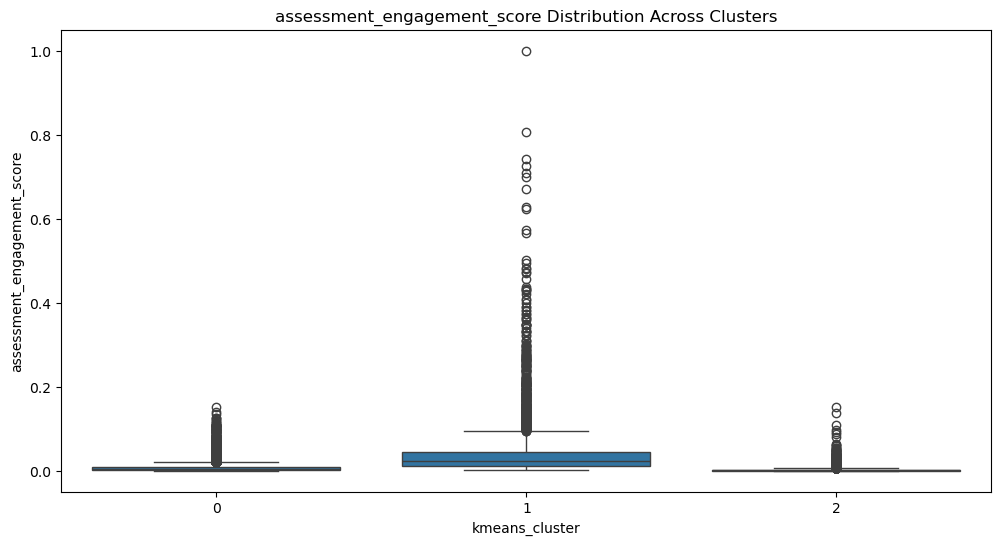

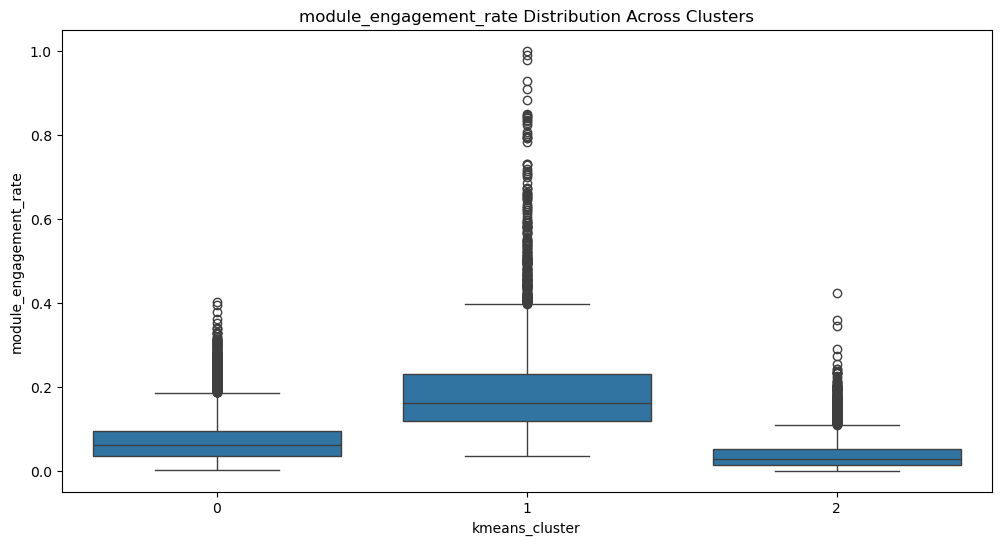

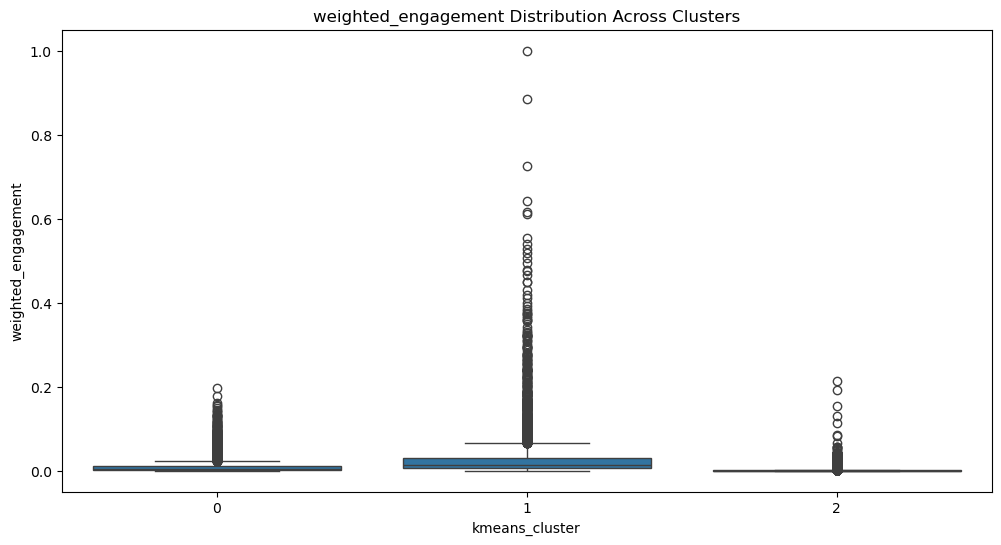

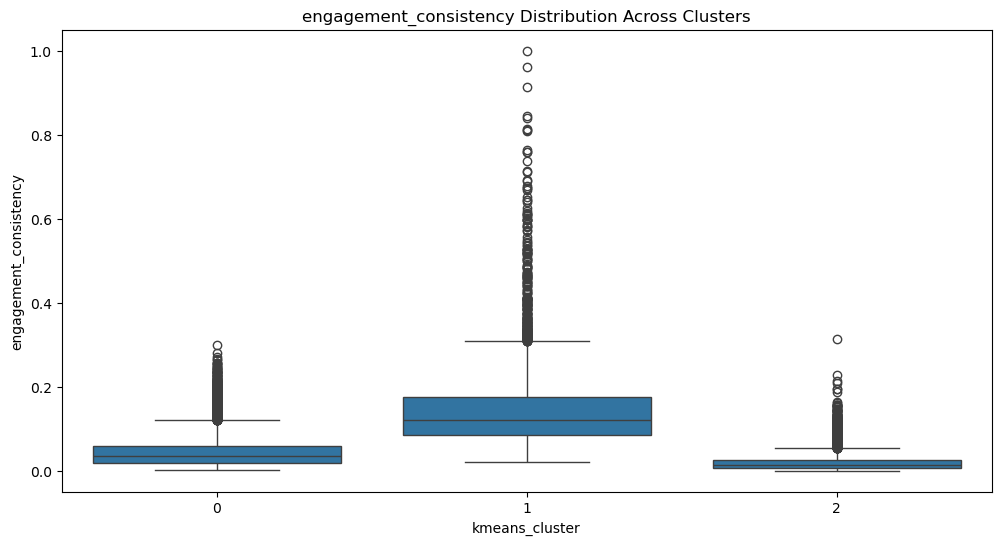

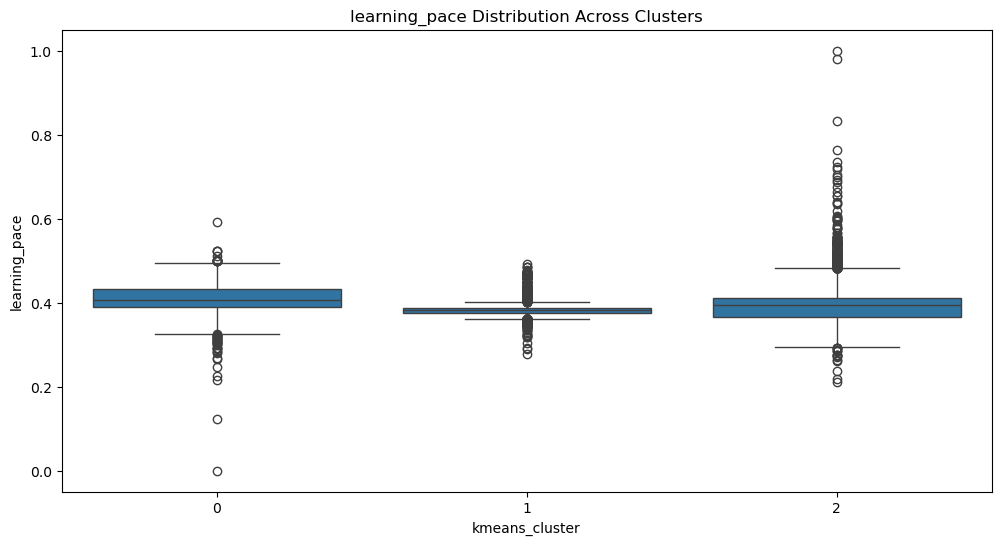

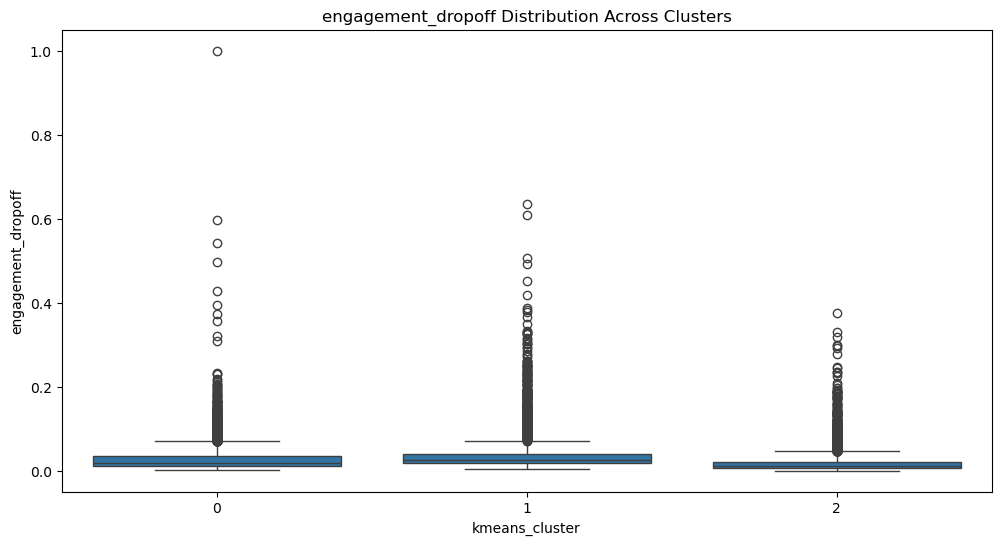

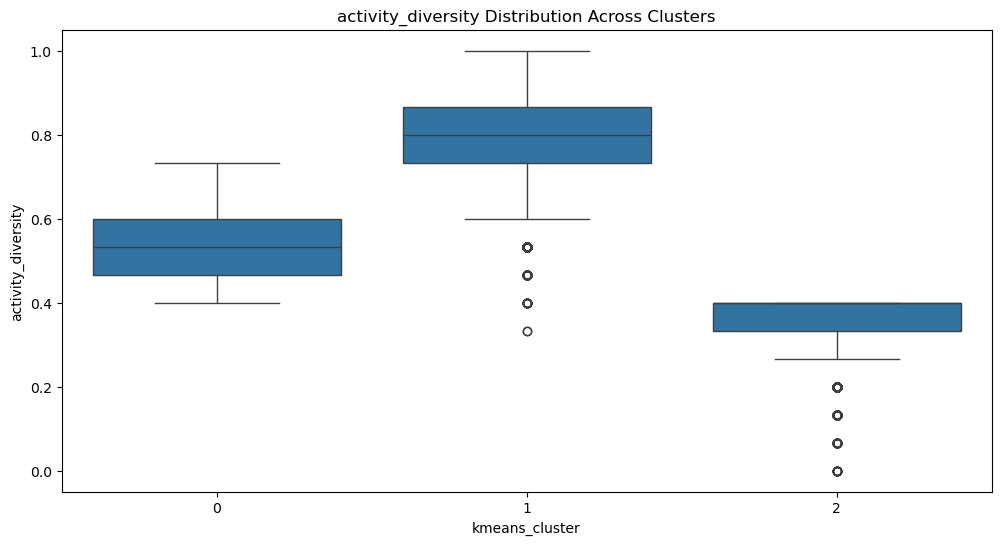

In [58]:
for col in engagement_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='kmeans_cluster', y=col, data=final_data_encoded_df)
    plt.title(f'{col} Distribution Across Clusters')
    plt.show()



assessment_engagement_score - ANOVA p-value: nan

module_engagement_rate - ANOVA p-value: nan

weighted_engagement - ANOVA p-value: nan

engagement_consistency - ANOVA p-value: nan

learning_pace - ANOVA p-value: nan

engagement_dropoff - ANOVA p-value: nan

activity_diversity - ANOVA p-value: nan


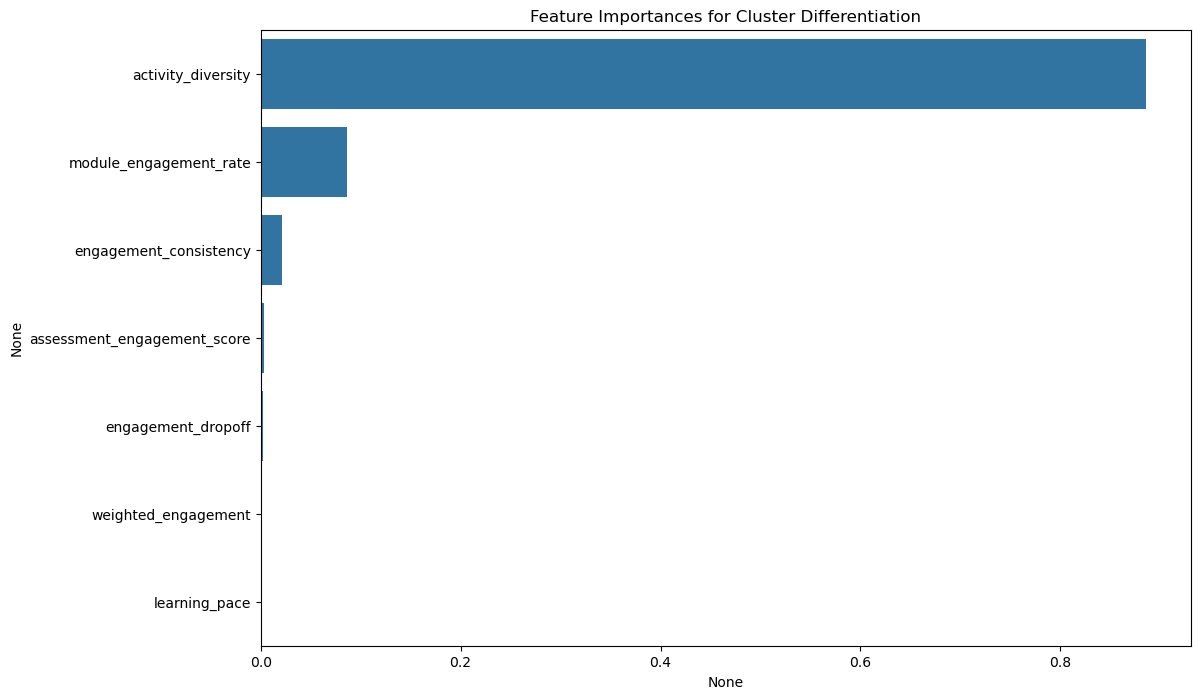

In [59]:
from scipy import stats
from sklearn.tree import DecisionTreeClassifier

for col in engagement_columns:
    f_stat, p_value = stats.f_oneway(*[final_data_encoded_df[final_data_encoded_df['kmeans_cluster'] == i][col] for i in range(4)])  # Adjust range if number of clusters is different
    print(f'{col} - ANOVA p-value: {p_value}')

X = final_data_encoded_df[engagement_columns]
y = final_data_encoded_df['kmeans_cluster']

model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=engagement_columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances for Cluster Differentiation')
plt.show()

In [60]:
df=final_data_encoded_df.copy()

In [61]:
engagement_columns = [
    'assessment_engagement_score', 'module_engagement_rate', 'weighted_engagement',
    'engagement_consistency', 'learning_pace', 'engagement_dropoff', 'activity_diversity'
]

cluster_summary = df.groupby('kmeans_cluster')[engagement_columns].describe().unstack()
cluster_summary

                                    kmeans_cluster
assessment_engagement_score  count  0                 11239.000000
                                    1                  4013.000000
                                    2                  7193.000000
                             mean   0                     0.007496
                                    1                     0.043175
                                                          ...     
activity_diversity           75%    1                     0.866667
                                    2                     0.400000
                             max    0                     0.733333
                                    1                     1.000000
                                    2                     0.400000
Length: 168, dtype: float64

In [62]:
df['average_engagement'] = df[engagement_columns].mean(axis=1)

def classify_engagement(row):
    if row['average_engagement'] > df['average_engagement'].quantile(0.75):
        return 'High Engagement'
    elif row['average_engagement'] < df['average_engagement'].quantile(0.25):
        return 'Low Engagement'
    else:
        return 'Moderate Engagement'

df['engagement_classification'] = df.apply(classify_engagement, axis=1)

In [63]:
df.engagement_classification.value_counts()

engagement_classification
Moderate Engagement    11223
High Engagement         5611
Low Engagement          5611
Name: count, dtype: int64

In [64]:
classification_summary = df.groupby(['kmeans_cluster', 'engagement_classification']).size().unstack(fill_value=0)
classification_summary

engagement_classification,High Engagement,Low Engagement,Moderate Engagement
kmeans_cluster,,,
0,1666,391,9182
1,3884,0,129
2,61,5220,1912


_________________

__________

In [65]:
df = pd.concat([df,study_method],axis=1)
df.head()

,activity_type_dataplus,activity_type_dualpane,activity_type_externalquiz,activity_type_folder,activity_type_forumng,activity_type_glossary,activity_type_homepage,activity_type_quiz,activity_type_resource,gender_F,gender_M,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,highest_education_A Level or Equivalent,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,imd_band_0-10%,imd_band_10-20,imd_band_20-30%,imd_band_30-40%,imd_band_40-50%,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_0-35,age_band_35-55,age_band_55<=,disability_N,disability_Y,final_result_Distinction,final_result_Fail,final_result_Pass,final_result_Withdrawn,study_status_finished,study_status_unfinished,withdrawal_status_didn't withdraw,withdrawal_status_early withdrawal,withdrawal_status_late withdrawal,withdrawal_status_normal withdrawal,sum,count,score,num_of_prev_attempts,assessment_engagement_score,submission_timeliness,score_per_weight,module_engagement_rate,repeat_student,performance_by_registration,weighted_engagement,cumulative_score,engagement_consistency,learning_pace,engagement_dropoff,activity_diversity,improvement_rate,kmeans_cluster,average_engagement,engagement_classification,study_method_preference
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.046918,0.055064,0.618000,0.000000,0.027572,0.584637,0.032258,0.202552,0.000000,0.601644,0.038912,0.073336,0.125758,0.470793,0.097390,0.400000,0.644654,2,0.194711,High Engagement,Informational
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.006647,0.015226,0.873077,0.051282,0.001379,0.544713,0.070656,0.026109,0.307692,0.601942,0.001298,0.116558,0.018097,0.349810,0.013270,0.533333,0.623966,0,0.134757,Moderate Engagement,Collaborative
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.015699,0.016291,0.820000,0.000000,0.004209,0.586641,0.043282,0.079065,0.000000,0.606112,0.005940,0.084399,0.049563,0.489130,0.042164,0.333333,0.633268,2,0.143343,Moderate Engagement,Informational
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.002162,0.003911,0.825000,0.333333,0.000268,0.599917,0.286206,0.017870,1.000000,0.597892,0.000118,0.058792,0.008018,0.363658,0.009982,0.266667,0.567693,2,0.095226,Low Engagement,Offline Content
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.024475,0.040586,0.737500,0.000000,0.003367,0.593967,0.087350,0.057421,0.000000,0.605095,0.002970,0.160185,0.046306,0.420277,0.020365,0.466667,0.623440,0,0.145339,Moderate Engagement,Collaborative


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 22445 entries, 0 to 22444

Data columns (total 75 columns):

 #   Column                                         Non-Null Count  Dtype  

---  ------                                         --------------  -----  

 0   activity_type_dataplus                         22445 non-null  float64

 1   activity_type_dualpane                         22445 non-null  float64

 2   activity_type_externalquiz                     22445 non-null  float64

 3   activity_type_folder                           22445 non-null  float64

 4   activity_type_forumng                          22445 non-null  float64

 5   activity_type_glossary                         22445 non-null  float64

 6   activity_type_homepage                         22445 non-null  float64

 7   activity_type_quiz                             22445 non-null  float64

 8   activity_type_resource                         22445 non-null  float64

 9   gender_F                            

In [67]:
df['engagement_classification'].value_counts()

engagement_classification
Moderate Engagement    11223
High Engagement         5611
Low Engagement          5611
Name: count, dtype: int64

In [68]:
df["study_method_preference"].value_counts()

study_method_preference
Collaborative      9555
Offline Content    6747
Interactive        3195
Informational      2492
Resource-Based      456
Name: count, dtype: int64

In [69]:
method_mapping = {
    'Collaborative': 0,
    'Offline Content': 1,
    'Interactive': 2,
    'Informational': 3,
    'Resource-Based': 4
}

# Apply the mapping to the 'study_method_preference' column
df['study_method_preference'] = df['study_method_preference'].map(method_mapping)

# Verify the changes
print(df['study_method_preference'].value_counts())

study_method_preference

0    9555

1    6747

2    3195

3    2492

4     456

Name: count, dtype: int64


In [70]:
le = LabelEncoder()
df['engagement_classification'] = le.fit_transform(df["engagement_classification"])

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df.drop(columns='study_method_preference')
y = df['study_method_preference'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 7. Classification on Learning Style

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score

In [74]:
from sklearn.svm import SVC

Svc_model = SVC(C = 1, kernel = 'linear')
logistic_model = LogisticRegression(C = 1, solver = 'lbfgs')
Knn_model = KNeighborsClassifier(n_neighbors = 7)
Naive_model = GaussianNB()
dt_model = DecisionTreeClassifier(random_state = 42)
rf_model = RandomForestClassifier(random_state = 42)
adaboost_model = AdaBoostClassifier(random_state = 42)
gradientboost_model = GradientBoostingClassifier(random_state = 42)
xgboost_model = XGBClassifier(random_state=42)

In [75]:
X_train

,activity_type_dataplus,activity_type_dualpane,activity_type_externalquiz,activity_type_folder,activity_type_forumng,activity_type_glossary,activity_type_homepage,activity_type_quiz,activity_type_resource,gender_F,gender_M,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,highest_education_A Level or Equivalent,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,imd_band_0-10%,imd_band_10-20,imd_band_20-30%,imd_band_30-40%,imd_band_40-50%,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_0-35,age_band_35-55,age_band_55<=,disability_N,disability_Y,final_result_Distinction,final_result_Fail,final_result_Pass,final_result_Withdrawn,study_status_finished,study_status_unfinished,withdrawal_status_didn't withdraw,withdrawal_status_early withdrawal,withdrawal_status_late withdrawal,withdrawal_status_normal withdrawal,sum,count,score,num_of_prev_attempts,assessment_engagement_score,submission_timeliness,score_per_weight,module_engagement_rate,repeat_student,performance_by_registration,weighted_engagement,cumulative_score,engagement_consistency,learning_pace,engagement_dropoff,activity_diversity,improvement_rate,kmeans_cluster,average_engagement,engagement_classification
8838,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.079926,0.132775,0.522500,0.000000,0.011270,0.592819,0.081994,0.125136,0.0,0.591723,0.012094,0.189395,0.059852,0.400989,0.016599,0.533333,0.631282,0,0.165610,2
9237,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.171678,0.178104,0.789167,0.000000,0.020963,0.419357,0.470998,0.154856,0.0,0.604102,0.012327,0.443461,0.119640,0.380895,0.021699,0.866667,0.630249,1,0.225292,0
540,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.011234,0.016957,0.793333,0.000000,0.002857,0.417478,0.324198,0.051067,0.0,0.604677,0.001680,0.089980,0.030815,0.371039,0.021128,0.666667,0.615173,0,0.163607,2
13681,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.005326,0.006140,0.582000,0.000000,0.000263,0.423323,0.582000,0.025232,0.0,0.605379,0.000000,0.070690,0.009146,0.386625,0.006891,0.400000,0.583611,2,0.118308,1
20609,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.042900,0.088029,0.847273,0.333333,0.005976,0.589783,0.247584,0.084201,1.0,0.598745,0.003834,0.221331,0.027515,0.402129,0.010129,0.400000,0.626862,2,0.133398,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19181,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0082

In [77]:
from sklearn.metrics import accuracy_score

models = {
    'SVM': Svc_model,
    'Logistic Regression': logistic_model,
    'KNN': Knn_model,
    'GaussianNB': Naive_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'AdaBoost': adaboost_model,
    'GradientBoost': gradientboost_model
}

# Initialize dictionaries to store accuracies
train_accuracies = {}
test_accuracies = {}

train_f1scores = {}
test_f1scores = {}

for model_name, model in models.items():
        model.fit(X_train, y_train)

        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        train_accuracy = accuracy_score(y_train, train_predictions)
        test_accuracy = accuracy_score(y_test, test_predictions)

        train_f1score = f1_score(y_train, train_predictions, average='weighted')
        test_f1score = f1_score(y_test, test_predictions,average='weighted')
        

        train_accuracies[f'{model_name}'] = train_accuracy
        test_accuracies[f'{model_name}'] = test_accuracy

        train_f1scores[f'{model_name}'] = train_f1score
        test_f1scores[f'{model_name}'] = test_f1score
        
        
        print(model_name)
        print('Classification Report for train')
        print(classification_report(y_train, train_predictions))
        print('Classification Report for test')
        print(classification_report(y_test, test_predictions))
        print('-'*50)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Model': list(train_accuracies.keys()),
    'Train Accuracy': list(train_accuracies.values()),
    'Test Accuracy': list(test_accuracies.values()),
    'Train F1score': list(train_f1scores.values()),
    'Test F1score': list(test_f1scores.values())
})

SVM

Classification Report for train

              precision    recall  f1-score   support



           0       0.90      0.93      0.91      6688

           1       0.89      0.97      0.93      4723

           2       0.88      0.89      0.89      2237

           3       0.82      0.67      0.74      1744

           4       0.89      0.03      0.05       319



    accuracy                           0.89     15711

   macro avg       0.88      0.70      0.70     15711

weighted avg       0.89      0.89      0.88     15711



Classification Report for test

              precision    recall  f1-score   support



           0       0.91      0.93      0.92      2867

           1       0.88      0.97      0.92      2024

           2       0.90      0.90      0.90       958

           3       0.82      0.65      0.72       748

           4       0.67      0.01      0.03       137



    accuracy                           0.89      6734

   macro avg       0.84      0.69      0

In [79]:
results_df = results_df.sort_values(by='Test F1score', ascending=False)
results_df

,Model,Train Accuracy,Test Accuracy,Train F1score,Test F1score
7,GradientBoost,0.956527,0.938075,0.955839,0.936864
5,Random Forest,1.000000,0.924710,1.000000,0.921026
4,Decision Tree,1.000000,0.903326,1.000000,0.903404
0,SVM,0.886895,0.890258,0.876378,0.879005
1,Logistic Regression,0.878620,0.878527,0.867574,0.867169
6,AdaBoost,0.701483,0.698990,0.731436,0.727228
2,KNN,0.794412,0.740570,0.780069,0.719091
3,GaussianNB,0.403348,0.401544,0.470095,0.469208


In [80]:
#from sklearn.model_selection import GridSearchCV

#param_grid = {
#    'C': [0.1, 1, 10, 100],
#    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#    'gamma': ['scale', 'auto']
#}

#grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
#grid_search.fit(X_train, y_train)

#print("Best parameters found: ", grid_search.best_params_)

# Best estimator from grid search
#best_svc_model = grid_search.best_estimator_

# Make predictions using the best model
#y_pred = best_svc_model.predict(X_test)

# Evaluate the model
#accuracy = accuracy_score(y_test, y_pred)
#report = classification_report(y_test, y_pred)

#print(f"Accuracy: {accuracy}")
#print("Classification Report:")
#print(report)

## 7.1 Evaluation for SVC

In [81]:
from sklearn.svm import SVC
svc_model = SVC(C=10, gamma='scale', kernel='linear', random_state=42)
svc_model.fit(X_train, y_train)

SVC(C=10, kernel='linear', random_state=42)

In [82]:
print("Training Report")
y_pred_train = svc_model.predict(X_train)
print(classification_report(y_train,y_pred_train))

# Predict and Evaluate Models
print("\n Testing Report")
y_pred = svc_model.predict(X_test)
print(classification_report(y_test, y_pred))

Training Report

              precision    recall  f1-score   support



           0       0.94      0.94      0.94      6688

           1       0.97      0.99      0.98      4723

           2       0.88      0.89      0.89      2237

           3       0.91      0.90      0.91      1744

           4       0.86      0.56      0.68       319



    accuracy                           0.93     15711

   macro avg       0.91      0.86      0.88     15711

weighted avg       0.93      0.93      0.93     15711





 Testing Report

              precision    recall  f1-score   support



           0       0.94      0.94      0.94      2867

           1       0.96      0.99      0.97      2024

           2       0.90      0.90      0.90       958

           3       0.90      0.87      0.89       748

           4       0.77      0.52      0.62       137



    accuracy                           0.93      6734

   macro avg       0.89      0.84      0.86      6734

weighted avg       

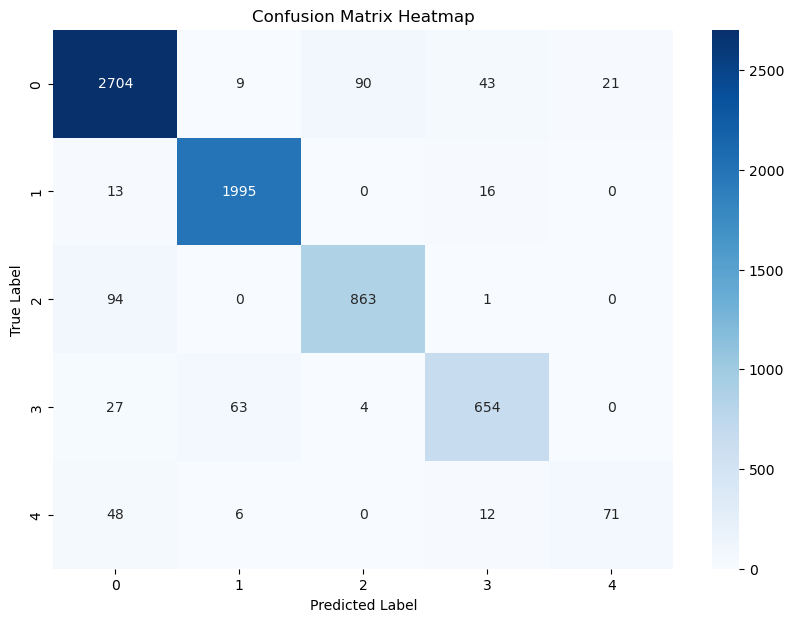

In [83]:
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [84]:
cm

array([[2704,    9,   90,   43,   21],
       [  13, 1995,    0,   16,    0],
       [  94,    0,  863,    1,    0],
       [  27,   63,    4,  654,    0],
       [  48,    6,    0,   12,   71]], dtype=int64)

## 7.2 Evaluation For GBoost

In [85]:

gb_model = GradientBoostingClassifier(random_state = 42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [86]:
print("Training Report")
y_pred_train = gb_model.predict(X_train)
print(classification_report(y_train,y_pred_train))

# Predict and Evaluate Models
print("\n Testing Report")
y_pred = gb_model.predict(X_test)
print(classification_report(y_test, y_pred))

Training Report

              precision    recall  f1-score   support



           0       0.95      0.97      0.96      6688

           1       0.98      1.00      0.99      4723

           2       0.93      0.93      0.93      2237

           3       0.95      0.90      0.92      1744

           4       0.93      0.67      0.78       319



    accuracy                           0.96     15711

   macro avg       0.95      0.89      0.92     15711

weighted avg       0.96      0.96      0.96     15711





 Testing Report

              precision    recall  f1-score   support



           0       0.94      0.95      0.95      2867

           1       0.97      0.99      0.98      2024

           2       0.91      0.92      0.92       958

           3       0.91      0.84      0.87       748

           4       0.77      0.55      0.64       137



    accuracy                           0.94      6734

   macro avg       0.90      0.85      0.87      6734

weighted avg       

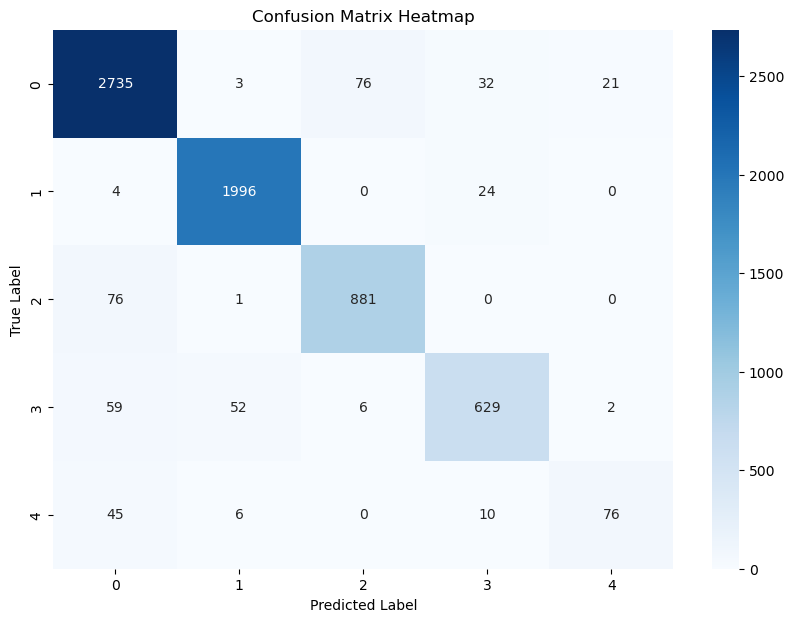

In [87]:
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [88]:
cm

array([[2735,    3,   76,   32,   21],
       [   4, 1996,    0,   24,    0],
       [  76,    1,  881,    0,    0],
       [  59,   52,    6,  629,    2],
       [  45,    6,    0,   10,   76]], dtype=int64)

In [89]:
print("Train Acc:",round(accuracy_score(y_train,y_pred_train),2),"%")
print("Test Acc:",round(accuracy_score(y_test,y_pred),2),"%")

Train Acc: 0.96 %

Test Acc: 0.94 %


In [92]:
# Saving the model (SVC)
joblib.dump(svc_model, 'SVC.pkl')

['SVC.pkl']

In [93]:
# Saving the model (GB)
joblib.dump(gb_model, 'GB.pkl')

['GB.pkl']

In [94]:
data = pd.concat([df,ids], axis=1)
data.to_csv("data.csv")

# 8. Recommendation System

In [102]:
def recommend_learning_path(student_id):
    # Concatenate the DataFrame and IDs
    recomend_data = pd.concat([df, ids], axis=1)
    
    # Get the data for the specific student
    student_data = recomend_data[recomend_data['id_student'] == student_id]
    
    # Check if student exists in the data
    if student_data.empty:
        return "Student not found."
    
    # Remove unnecessary columns for prediction
    student_data.drop(columns=['id_student', 'study_method_preference'], inplace=True)
    
    # Predict the study method preference
    predicted_label = gb_model.predict(student_data)
    
    # Extract engagement level
    engagement = student_data["engagement_classification"].iloc[0]
    
    # Recommendations based on study method and engagement
    recommendations = {
        0: {  # Collaborative
            0: ["Interactive AI Basics: Weekly Quizzes and Forums","Applied AI: Practical Exercises with Peer Feedback"
               ,"Introduction to Machine Learning: Online Workshops","AI Ethics: Case Studies and Discussion Groups"],  # Moderate Engagement
            1: ["Collaborative AI Projects: Team-Based Learning","Advanced AI Techniques: Group Workshops and Peer Reviews"
               ,"Machine Learning Bootcamp: Intensive Group Projects","AI in Practice: Team Challenges and Hackathons"],      # High Engagement
            2: ['Introduction to AI: Self-Paced Fundamentals', 'AI Basics: Introductory Video Series',
                'Foundations of Machine Learning: Self-Study Edition','AI for Everyone: Introductory Readings and Quizzes'] # Low Engagement
        },
        1: {  # Offline Content
            0: ["AI Principles: Self-Study with Case Studies", "Machine Learning: Offline Course with Practice Problems",
                "Applied AI: Textbook and Supplementary Materials", "Data Science: Case Studies and Analytical Exercises"], # Moderate Engagement
            1: ["Advanced AI: Comprehensive Textbook with Projects", "Deep Learning: In-Depth Study with Capstone Projects",
               "AI and Machine Learning: Project-Based Learning", "Data Science Mastery: Offline Content with Comprehensive Projects"], # High Engagement
            2: ['AI Basics: Essential Readings and Key Concepts', 'Machine Learning Fundamentals: Self-Study Workbook',
               "AI Concepts: Downloadable Lecture Series", "Introduction to Data Science: Offline Learning Modules"] # Low Engagement
        },
        2: {  # Interactive
            0: ["Machine Learning: Interactive Coding Exercises", "AI Applications: Interactive Case Studies",
               "Data Science: Interactive Projects and Peer Reviews", "AI Ethics: Discussion Forums and Interactive Scenarios"], # Moderate Engagement
            1: ["Advanced AI: Interactive Group Projects and Hackathons", "Deep Learning: Interactive Labs and Collaborative Projects",
               "Machine Learning Mastery: Interactive Workshops and Challenges","AI Research: Collaborative Research Projects and Peer Feedback"], # High Engagement
            2: ["AI Basics: Interactive Quizzes and Flashcards", "Introduction to Machine Learning: Interactive Visualizations",
               "AI Fundamentals: Interactive Notebooks", "AI Concepts: Gamified Learning Modules"] # Low Engagement
        },
        3: {  # Informational
            0: ["Machine Learning: Structured Video Course", "AI Concepts: Comprehensive Video Series",
               "Data Science: Interactive Reading and Video Modules", "AI in Practice: Lecture Notes and Case Studies"], # Moderate Engagement
            1: ["Advanced AI: Detailed Lecture Series and Readings", "Deep Learning: Advanced Lecture Series with Supplemental Readings",
               "AI and Machine Learning: Research Papers and Advanced Lectures", "Data Science Masterclass: Comprehensive Reading and Video Content"], # High Engagement
            2: ["AI Overview: Short Video Lectures", "Introduction to Machine Learning: Podcast Series",
               "AI Fundamentals: Infographics and Summaries", "Data Science: Essential Readings and Articles"] # Low Engagement
        },
        4: {  # Resource-Based
            0: ["Machine Learning: Comprehensive eBooks and Guides", "AI Applications: Case Study Compilations",
               "Data Science: In-Depth Articles and White Papers", "AI Concepts: Research Articles and Detailed Guides"], # Moderate Engagement
            1: ["Advanced AI: Research Papers and Technical Reports", "Deep Learning: Comprehensive Textbooks and Resource Repositories",
               "Machine Learning Mastery: Advanced Documentation and APIs", "AI Ethics: Government and Institutional Reports"], # High Engagement
            2: ["AI Basics: Curated Reading Lists", "Introduction to Machine Learning: Beginner-Friendly Blogs",
               "Data Science Overview: Quick Reference Guides", "AI Fundamentals: Online Documentation"] # Low Engagement
        }
    }
    
    # Determine study method and engagement level
    study_method = predicted_label[0]
    engagement_level = engagement.iloc[0] if isinstance(engagement, pd.Series) else engagement
    
    # Get the recommended courses based on study method and engagement level
    recommended_courses = recommendations.get(study_method, {}).get(engagement_level, [])

    return recommended_courses, study_method, engagement_level

In [103]:
def return_map_to_original_preference(x):
    if x == 0:
        return 'Collaborative'
    elif x == 1:
        return 'Offline Content'
    elif x == 2:
        return 'Interactive'
    elif x==3:
        return 'Informational'
    elif x==4:
        return 'Resource-Based'

In [104]:
def return_map_to_original_engagement(x):
    if x == 0:
        return 'Moderate Engagement'
    elif x == 1:
        return 'High Engagement'
    elif x == 2:
        return 'Low Engagement'

In [105]:
data.sample(1)[["id_student","study_method_preference","engagement_classification"]]

,id_student,study_method_preference,engagement_classification
19404,691371,0,2


In [106]:
# Get recommendations for a student
student_id = 677111

recommendations, study_method, engegement = recommend_learning_path(student_id)
study_method = return_map_to_original_preference(study_method)
engegement = return_map_to_original_engagement(engegement)

print(f"Study method preference for student {student_id}: {study_method}")
print(f"Level of engagement for student {student_id}: {engegement}")
print(f"Recommended courses for student {student_id}: {recommendations}")

Study method preference for student 677111: Interactive

Level of engagement for student 677111: Moderate Engagement

Recommended courses for student 677111: ['Machine Learning: Interactive Coding Exercises', 'AI Applications: Interactive Case Studies', 'Data Science: Interactive Projects and Peer Reviews', 'AI Ethics: Discussion Forums and Interactive Scenarios']


In [107]:
# Get recommendations for a student
student_id = 645019

recommendations, study_method, engegement = recommend_learning_path(student_id)
study_method = return_map_to_original_preference(study_method)
engegement = return_map_to_original_engagement(engegement)

print(f"Study method preference for student {student_id}: {study_method}")
print(f"Level of engagement for student {student_id}: {engegement}")
print(f"Recommended courses for student {student_id}: {recommendations}")

Study method preference for student 645019: Offline Content

Level of engagement for student 645019: Low Engagement

Recommended courses for student 645019: ['AI Basics: Essential Readings and Key Concepts', 'Machine Learning Fundamentals: Self-Study Workbook', 'AI Concepts: Downloadable Lecture Series', 'Introduction to Data Science: Offline Learning Modules']
